<a href="https://colab.research.google.com/github/VivianQian19/Content-Analysis-2020/blob/master/final_project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment and dependencies



In [0]:
#install all the dependencies here
!pip install jieba

In [0]:
!pip install scipy

In [0]:
!pip install nltk

In [0]:
#!pip install hanlp

In [0]:
#Import necessary packages

#for final project
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
# import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas as pd #gives us DataFrames
# import docx #reading MS doc files, install as `python-docx` #install later if needed
import string
#import hanlp
#Stuff for pdfs
#Install as `pdfminer2`
# import pdfminer.pdfinterp
# import pdfminer.converter
# import pdfminer.layout
# import pdfminer.pdfpage

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook

#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition # for PCA
import sklearn.metrics
import sklearn.metrics.pairwise # For cosine similarity
import sklearn.manifold # for T-SNE

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json
import jieba
import spacy
import copy
import nltk

In [0]:
#mount google drive 
from google.colab import drive
drive.mount('/content/drive')
# example code that read from google drive
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# get Chinese font for plotting in matlib
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip"
!unzip "NotoSansCJKsc-hinted.zip"
!mv NotoSansCJKsc-Regular.otf /usr/share/fonts/truetype/
import matplotlib.font_manager as matfm

font_path= '/usr/share/fonts/truetype/NotoSansCJKsc-Regular.otf'
fontprop = matfm.FontProperties(fname=font_path, size = 15)

--2020-03-31 00:56:26--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.182.128, 2607:f8b0:4001:c0a::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121063622 (115M) [application/zip]
Saving to: ‚ÄòNotoSansCJKsc-hinted.zip.2‚Äô

NotoSansCJKsc-hinte 100%[===================>] 115.46M   129MB/s    in 0.9s    

2020-03-31 00:56:27 (129 MB/s) - ‚ÄòNotoSansCJKsc-hinted.zip.2‚Äô saved [121063622/121063622]

Archive:  NotoSansCJKsc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKsc-Black.otf  
  inflating: NotoSansCJKsc-Bold.otf  
  inflating: NotoSansCJKsc-DemiLight.otf  
  inflating: NotoSansCJKsc-Light.otf  
  inflating: NotoSansCJKsc-Medium.o

# Import and Clean Data

In [0]:
#def openjsonfile()
# for jsonfile in sina-json:
      #with open('')
#"/content/drive/My Drive/final project/sina_export_3_18"
wd = "/content/drive/My Drive/final project/"

In [0]:
with open(wd + "sina_export_3_18/accounts.json") as accounts_data_file:
    accounts_data = pd.read_json(accounts_data_file,lines=True)
    accounts_df = pd.DataFrame(accounts_data)
    

In [0]:
accounts_df.shape #I used 62 Weibo accounts as crawlers to scrape Weibo

(62, 4)

In [0]:
with open(wd + 'sina_export_3_18/information.json') as info_data_file:
    info_data = pd.read_json(info_data_file,lines=True)
    info_df = pd.DataFrame(info_data)
 

I have selected 16 Weibo accounts as starting points for scraping. These IDs are selected by me from across different occupations and industries based on this website (https://bang.weibo.com/?display=0&retcode=6102) that lists the most influential weibo accounts by topic and time period.



## user_ids


In [0]:
info_df.head(16)

_id                    crawl_time  ... city sex_orientation
0   2803301701  {'$numberInt': '1583866630'}  ...  NaN             NaN
1   1699432410  {'$numberInt': '1583866630'}  ...  NaN             NaN
2   1980768563  {'$numberInt': '1583876276'}  ...  NaN             NaN
3   2656274875  {'$numberInt': '1583876274'}  ...  NaN             NaN
4   1700162184  {'$numberInt': '1583890176'}  ...  ‰∏úÂüéÂå∫             NaN
5    162782539  {'$numberInt': '1583890176'}  ...  NaN             NaN
6   1989660417  {'$numberInt': '1583890176'}  ...  ÊúùÈò≥Âå∫             NaN
7   1483330984  {'$numberInt': '1583890177'}  ...  ‰∏úÂüéÂå∫             NaN
8   1665808371  {'$numberInt': '1583890177'}  ...   Ê∑±Âú≥             NaN
9   1749127163  {'$numberInt': '1583890177'}  ...  Êµ∑Ê∑ÄÂå∫             NaN
10  1280463227  {'$numberInt': '1583890178'}  ...  NaN             ÂºÇÊÄßÊÅã
11  1968758563  {'$numberInt': '1583890178'}  ...  ÈïøÂÆÅÂå∫             NaN
12  1781312093  {'$numberInt': '1583890179'}  ...  NaN             NaN
13  1792951112  {'$numberInt': '1583890178'}  ...  NaN             NaN
14  1263406744  {'$numberInt': '1583890179'}  ...  NaN             NaN
15  3945917804  {'$numberInt': '1583890179'}  ...  NaN             NaN

[16 rows x 15 columns]

In [0]:
print("Total number of Weibo accounts in the corpus is: ")
print(len(info_df)) 

Total number of Weibo accounts in the corpus is: 
16


In [0]:
drop_index = []
for index, row in info_df.iterrows():
  if row['_id'] == 162782539 or row['_id'] == 2656274875 or row['_id'] == 3945917804 or row['_id'] == 1583866630 or row ['_id'] == 1699432410:
    drop_index.append(index)
new_info_df = info_df.drop(drop_index, axis=0)
new_info_df

_id                    crawl_time  ... city sex_orientation
0   2803301701  {'$numberInt': '1583866630'}  ...  NaN             NaN
2   1980768563  {'$numberInt': '1583876276'}  ...  NaN             NaN
4   1700162184  {'$numberInt': '1583890176'}  ...  ‰∏úÂüéÂå∫             NaN
6   1989660417  {'$numberInt': '1583890176'}  ...  ÊúùÈò≥Âå∫             NaN
7   1483330984  {'$numberInt': '1583890177'}  ...  ‰∏úÂüéÂå∫             NaN
8   1665808371  {'$numberInt': '1583890177'}  ...   Ê∑±Âú≥             NaN
9   1749127163  {'$numberInt': '1583890177'}  ...  Êµ∑Ê∑ÄÂå∫             NaN
10  1280463227  {'$numberInt': '1583890178'}  ...  NaN             ÂºÇÊÄßÊÅã
11  1968758563  {'$numberInt': '1583890178'}  ...  ÈïøÂÆÅÂå∫             NaN
12  1781312093  {'$numberInt': '1583890179'}  ...  NaN             NaN
13  1792951112  {'$numberInt': '1583890178'}  ...  NaN             NaN
14  1263406744  {'$numberInt': '1583890179'}  ...  NaN             NaN

[12 rows x 15 columns]

In [0]:
len(new_info_df)

12

In [0]:
#convert json files to pandas dataframes
with open(wd + 'sina_export_3_18/tweets.json') as tweets_data_file:
    tweets_data = pd.read_json(tweets_data_file,lines=True)
    tweets_df = pd.DataFrame(tweets_data)
    

In [0]:
tweets_df.shape # In total, I have 28116 samples of tweets

(28116, 14)

In [0]:
# clean the data frame & will need to use like_num and repost_num column for network centrality measure

tweets_df['crawl_time']=tweets_df['crawl_time'].apply(lambda x: x['$numberInt'])
tweets_df['like_num']=tweets_df['like_num'].apply(lambda x: x['$numberInt'])
tweets_df['repost_num']=tweets_df['repost_num'].apply(lambda x: x['$numberInt'])
tweets_df['comment_num']=tweets_df['comment_num'].apply(lambda x: x['$numberInt'])

In [0]:
#convert json files to pandas dataframes
with open(wd + 'sina_export_3_18/comments.json') as comments_data_file:
    comments_data = pd.read_json(comments_data_file,lines=True)
    comments_df = pd.DataFrame(comments_data)
    

In [0]:
comments_df.shape # total number of comments in the corpus is 27592

(27592, 7)

In [0]:
# clean the data frame & will need to use like_num and repost_num column for network centrality measure
comments_df['crawl_time']=comments_df['crawl_time'].apply(lambda x: x['$numberInt'])
comments_df['like_num']=comments_df['like_num'].apply(lambda x: x['$numberInt'])

In [0]:
comments_df.sample()

_id  crawl_time  ... like_num          created_at
14038  C_4236825612387091  1584212836  ...        0 2018-05-06 23:43:25

[1 rows x 7 columns]

The following content analysis will mostly use the tweets and comments dataframe as they contain the majority of texts posted by Weibo users. 

In [0]:
tweets_df.loc[:,"content"][:2000:10]

0       „Äê#6ÁßçÊÉÖÂÜµ‰∏çÂ∫îËØ•ËøõË°åÊ∂àÊØí#„Äë‰∏≠ÂõΩÁñæÊéß‰∏≠ÂøÉÁ†îÁ©∂ÂëòÂº†ÊµÅÊ≥¢Ë°®Á§∫Ôºå‚ë†‰∏çÂØπÂÆ§Â§ñÁéØÂ¢ÉÂ§ßËßÑÊ®°Ê∂àÊØíÔºõ‚ë°Èõ®Èõ™...
10      „Äê#Èü©ÂõΩÊñ∞Â¢û477‰æãÁ¥ØËÆ°4812‰æã#„ÄëÈü©ÂõΩ‰∏≠Â§ÆÈò≤Áñ´ÂØπÁ≠ñÊú¨ÈÉ®3Êó•ÈÄöÊä•ÔºåÊà™Ëá≥3Êó•0Êó∂ÔºåÈü©ÂõΩËæÉ2Êó•...
20      „ÄêÈÄÅÂà´ÔºÅ#Ê≠¶Ê±âÂ∏Ç‰∏≠ÂøÉÂåªÈô¢Ê¢Ö‰ª≤ÊòéÂåªÁîüÊÑüÊüìÂéª‰∏ñ#„ÄëÊ≠¶Ê±â‰∏≠ÂøÉÂåªÈô¢ÂæÆ‰ø°ÂÖ¨Âè∑ÂèëÂ∏ÉÂÖ¨ÂëäÔºöÊ≠¶Ê±âÂ∏Ç‰∏≠ÂøÉÂåªÈô¢Áúº...
30      „Äê#Èü©ÂõΩÊñ∞Â¢û374‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé#Ôºå#Èü©ÂõΩÁ¥ØËÆ°Á°ÆËØäÊñ∞ÂÜ†ËÇ∫ÁÇéË∂Ö5000‰æã#„ÄëÈü©ÂõΩ‰∏≠Â§ÆÈò≤Áñ´ÂØπÁ≠ñÊú¨ÈÉ®3...
40      „Äê#ÂÆÖÂÆ∂Êó•‰πÖÈ¢àÁóõËÇ©ËÉåÁóõÊÄé‰πàÂäû#Ôºü„Äë#È™®Áßë‰∏ª‰ªªÁ§∫ËåÉÁºìËß£ËÇ©È¢àËÉåÁóõÂä®‰Ωú#ÔºåÊà≥‚Üì‚ÜìËΩ¨ÂèëÔºåËµ∂Á¥ßËØïËØïÂêßÔºÅ...
                              ...                        
1950            Â••Â∑¥È©¨ÊâìÂìç‰∫Ü‚ÄúÂõ¥Ââø‰∏≠ÂõΩ‚ÄùÁöÑ‰ª§Êû™ÔºÅ  http://sinaurl.cn/h9yoM
1960           Ê•ºÂ∏ÇÂ∑≤Êàê‰∏≠ÂõΩÁªèÊµéÁöÑ‚ÄúÊé©‰ΩìÊØÅÁÅ≠ËÄÖ‚ÄùÔºÅ  http://sinaurl.cn/hSis2
1970            Âì•Êú¨ÂìàÊ†πÂú®ËßÅËØÅ‰∫∫Á±ªÁöÑÁü≠ËßÜÂíåËá™ÁßÅÔºÅ  http://sinau

In [0]:
comments_df.loc[:,"content"][:100:10]

0                        Â∏åÊúõ‰∏≠ÂõΩÁóÖ‰æãÂø´‰∫õÊ∏ÖÈõ∂ÔºÅÔºÅ‰∏≠ÂõΩÂä†Ê≤πÔºÅÔºÅ
10              Â§ßÂÆ∂‰∏ÄÂÆö‰∏çËÉΩÊéâ‰ª•ËΩªÂøÉÔºåËøòË¶ÅÁªßÁª≠ÂùöÊåÅÂä™ÂäõÔºåÂÅöÂ•ΩËá™ÊàëÈò≤Êä§üôè
20                                  ÊÅ≠ÂñúÂÖ≥Èó®Â§ßÂêâÔºÅ
30                                    Â§ßÂ§ßËæõËã¶‰∫Ü
40                                  Â∑•ËµÑÂ∫îÂêåÂ∑•ÂêåÈÖ¨
50                   ÊàëÂè™Áü•ÈÅì ÊàëÂíåÊàëÂë®ËæπÁöÑÊúãÂèãÁöÑÂèØÊîØÈÖçÊî∂ÂÖ•Âú®ÂáèÂ∞ë
60                    ËøòÊúâÂ•ΩÂ§öÊñπÈù¢ÈÉΩË¶ÅËøôÊ†∑.Â¶ÇÊâãÊú∫,ÁîµËÑë,ÂåªÁñó.
70                                       ÂÅ∂Âêê
80                                 ÊÄé‰πàÊÑüËßâËøô‰πàÂà∫ËÄ≥
90    ÂüéÂ∏ÇÁöÑ‰∏äÂ•ΩÁöÑÂ≠¶Ê†°ÔºåÂú®ÂüéÈáåÁöÑÊµÅÂä®‰∫∫Âè£Â≠êÂ•≥‰∏äÂ∑ÆÂ≠¶Ê†°Ôºå‰∏çËøòÊòØ‰∏ÄÊ†∑ÂïäÔºÅ‰πüÂ∞±ÊòØÁ©∫Ë∞àÔºÅ
Name: content, dtype: object

# Cleaning


Two of my dataframe include texts that contain data for further analysis of Chinese nationalism. However, one of the dataframe has to do with comments of the scraped post. I think it makes little sense to do analysis on the comments outside of the context of the original posts that they respond to.

In [0]:
tweets_df.loc[:,"content"][300:450:10]

300    #CCTV‰ΩìÂùõÁõõÂÖ∏#„ÄêÊ≠§ÂàªÔºåÂêëÊâÄÊúâ‰∏∫ÂõΩ‰∫âÂÖâÁöÑ‰∏≠ÂõΩËøêÂä®ÂëòËá¥Êï¨ÔºÅ„Äë2015CCTV‰ΩìÂùõÈ£é‰∫ë‰∫∫Áâ©È¢Å...
310    „ÄêÊ∑±Âú≥ËøΩÊü•‚ÄúÈóÆÈ¢òË∑ëÈÅì‚Äù 6ÂÆ∂ÊñΩÂ∑•ÂèäÁõëÁêÜÂçï‰ΩçË¢´Á´ãÊ°àË∞ÉÊü•„ÄëËøëÊó•ÁªèÊ∑±Âú≥Á¶èÁî∞Âå∫‰ΩèÂª∫Â±ÄË∞ÉÊü•ÔºåÁæéËé≤Â∞èÂ≠¶Á≠â...
320    „Äê‰∫ëÂçó‰∏ÄÊ∞ëË≠¶Âú®ÊäóÈúáÊïëÁÅæÈÄî‰∏≠ÈÅ≠‰ΩôÈúá‰∏çÂπ∏ÈÅáÈöæ[Ê≥™]„ÄëËøëÊó•Ôºå‰∫ëÂçóÂ∑ßÂÆ∂ÂéøÂÖ¨ÂÆâÂ±Ä49Â≤ÅÁöÑÊ∞ëË≠¶Êù®Ê¥™‰ªüÔºåÂú®...
330    „Äê‰ªñ‰ª¨‰πüÈªòÈªòÂÆàÊä§ÁÉàÂ£´Â¢ì„Äë‚ë†Ê±üËãèÂæêÂÆ∂Ôºö1945Âπ¥ÂæêÂª∫Ê≠¶ÂºÄÂßã‰∏∫‰∏§Êó†ÂêçÊäóÊó•ÁÉàÂ£´ÂÆàÂ¢ìÔºåÂÖ∂ÂÑøÂ≠ôÂÖàÂêéÊé•Áè≠...
340    „ÄêÂøòÂ∏¶ÊâãÊú∫‰∫ÜÔºåÊàë‰ª¨ËøòËÉΩÂÅö‰ªÄ‰πàÔºü„ÄëÊô®Ëµ∑ÔºåÁà±‰∫∫Á¨¨‰∏ÄÊó∂Èó¥ÊãøËµ∑ÊâãÊú∫ÔºõÊúãÂèãËÅö‰ºöÔºåÂêÑËá™ÁúãÊâãÊú∫ÔºõÂêÉÈ•≠ÂñùËå∂Ââç...
350    „ÄêËÇá‰∫ãÈÄÉÈÄ∏Â•≥Âè∏Êú∫Âí¨‰º§Ê∞ëË≠¶ ‚ÄúÁîüÁåõ‚ÄùÔºÅ„ÄëÁîòËÇÉÂÖ∞Â∑û‰∏ÄÂêçÂ•≥Âè∏Êú∫Âú®‰∫∫Ë°åÈÅì‰∏äÈ©æËΩ¶ÔºåÊíûÂÄíË∑Ø‰∫∫ÂêéÁî±‰∫éËΩ¶ÈÄüËæÉ...
360    #‰∏ªÊí≠ËØ¥ËÅîÊí≠#„ÄêÊúüÂæÖÊ≠¶Ê±âÊï¥‰ΩìÂá∫Ëà±„Äë‰ªäÂ§©Ôºå#‰π†ËøëÂπ≥Âú®Ê≠¶Ê±âËÄÉÂØüÊñ∞ÂÜ†ËÇ∫ÁÇéÁñ´ÊÉÖÈò≤ÊéßÂ∑•‰Ωú#Ôºå‰ªäÂ§©ÔºåÊ≠¶Ê±â...
370    „ÄêÂπø‰∏

In [0]:
# look at a few sample tweets to find some features for cleaning
print(tweets_df.loc[:,"content"][390])
print(tweets_df.loc[:,"content"][420])
print(tweets_df.loc[:,"content"][420][0])
print(tweets_df.loc[:,"content"][300])
print(tweets_df.loc[:,"content"][430])
print(tweets_df.loc[:,"content"][360])
print(tweets_df.loc[:,"content"][360][0])


Ëß£ÊîæÂÜõÊù•ÊØîtmÂΩìÂú∞Ë∞ÅÂêπÁâõÈÄºÈÉΩÊúâÁî®„ÄÇ
„ÄêÂ∞è‰ºôÈ™ëÂä®ÊÑüÂçïËΩ¶1Â∞èÊó∂ Â∞øÂá∫‚ÄúÈÖ±Ê≤πÂ∞ø‚Äù ÂèØËÉΩËÇæË°∞ÔºÅ„ÄëË•øÂÆâ24Â≤ÅÂ∞è‰ºôÈòøÊòéÊúâÁÇπËÉñÔºå‰∏∫‰∫ÜÊâæÂØπË±°ÊÉ≥ÂáèËÇ•ÔºåÁ¨¨‰∏ÄÊ¨°ÂéªÂÅ•Ë∫´ÊàøÈ™ë‰∫Ü1Â∞èÊó∂Âä®ÊÑüÂçïËΩ¶Ôºå‰∏çÊñôÈöîÂ§©Ëµ∑‰∏ç‰∫ÜÂ∫äÔºåÂ∞øÊ∂≤ËøòÂèòÈÖ±Ê≤πËâ≤„ÄÇÂåªÈô¢ËØäÊñ≠‰∏∫Ê®™Á∫πËÇåÊ∫∂Ëß£ÁªºÂêàÂæÅÔºåÊòØÂâßÁÉàËøêÂä®ËøáÈáèÊâÄËá¥ÔºåÂèØËÉΩÂá∫Áé∞ÊÄ•ÊÄßËÇæË°∞Á´≠„ÄÇÂåªÁîüÊèêÈÜíÔºåËøêÂä®Ë¶ÅÂæ™Â∫èÊ∏êËøõÔºåÊääÊè°Â∫¶ÔºÅÂ∞è‰ºôÁ¨¨‰∏ÄÊ¨°È™ëÂä®ÊÑüÂçïËΩ¶ ËøêÂä®ËøáÈáèÊÉäÁé∞‚ÄúÈÖ±Ê≤πÂ∞ø‚Äù
„Äê
#CCTV‰ΩìÂùõÁõõÂÖ∏#„ÄêÊ≠§ÂàªÔºåÂêëÊâÄÊúâ‰∏∫ÂõΩ‰∫âÂÖâÁöÑ‰∏≠ÂõΩËøêÂä®ÂëòËá¥Êï¨ÔºÅ„Äë2015CCTV‰ΩìÂùõÈ£é‰∫ë‰∫∫Áâ©È¢ÅÂ•ñÁõõÂÖ∏Êè≠Êôì‰∫ÜÂçÅ‰∏™Â•ñÈ°π„ÄÇÊÅ≠ÂñúÂë®Áê¶„ÄÅÁÜäÊúùÂø†„ÄÅÂåó‰∫¨È©¨ÊãâÊùæÁªÑÂßî‰ºö„ÄÅËãèÁÇ≥Ê∑ª„ÄÅÁ•ÅÈ°∫„ÄÅÁî∞ÂæÑÁî∑Â≠ê4x100„ÄÅÈÉéÂπ≥„ÄÅ‰∏≠ÂõΩÂ•≥Êéí„ÄÅÂàòËôπ„ÄÅÂÆÅÊ≥ΩÊ∂õÔºÅÂêåÊó∂Ôºå‰πüÂêëÊâÄÊúâË∂ÖË∂äÊûÅÈôê„ÄÅË∂ÖË∂äÊ¢¶ÊÉ≥ÁöÑ‰∏≠ÂõΩËøêÂä®ÂëòËá¥Êï¨ÔºÅÊ±óÊ∞¥‰∏éÊãºÊêèÔºåÊç¢Êù•ÊâÄÊúâ‰∏≠ÂõΩ‰∫∫ÁöÑÈ™ÑÂÇ≤ÔºÅ [ÁªÑÂõæÂÖ±9Âº†]
#ÂØªÊâæÊúÄÁæéÂåªÁîü#„ÄêÂ¶ôÊâã‰ªÅÂøÉ Áªô‰∏ä‰∏áÂ≠©Â≠êÈÄÅÂéªÁîü‰πãÂ∏åÊúõ„

It seems all the posts that start with "„Äê" or "#" are reposts instead of original posts by the Weibo user. There seems to be no comments that comes with reposts, at least in the above examples. I will remove these retweets and see how many posts are left. 

In [0]:
#first, check and drop duplicate posts/rows
tweets_df.drop_duplicates(inplace=True)
#tweets_df.head()

In [0]:
tweets_df.shape # it seems the corpus contains no duplicates

(28116, 14)

## drop rows 

Since some of the user ID's in my corpus are owned by institutes or organizations or companies I will drop these tweets from my corpus since what I'm interested in are real people's online discourse. 

In [0]:
# iterate rows, for r[column][0] == "„Äê" or "#", drop the row 
# drop the rows with user_id = 1627825392, 2656274875, 3945917804, 1583866630, 1699432410
# if row['user_id'] == 1627825392 or row['user_id'] == 2656274875  or row['user_id'] == 3945917804, or row['user_id'] == 1583866630

drop_index = []
for index, row in tweets_df.iterrows():
    if len(row['content'])>0:
        if row['content'][0] == "„Äê" or row['content'][0] == "#" or row['user_id'] == 1627825392 or row['user_id'] == 2656274875 or row['user_id'] == 3945917804 or row['user_id'] == 1583866630 or row ['user_id'] == 1699432410:
            drop_index.append(index)             

In [0]:
new_tweets_df = tweets_df.drop(drop_index, axis=0) #By default the original DataFrame is not changed, and a new DataFrame is returned.

In [0]:
len(new_tweets_df) # I dropped around 5264 tweets 

22800

In [0]:
type(new_tweets_df['user_id'][11665])

numpy.int64

## create a new column for year for doc2vec


In [0]:
type(new_tweets_df['created_at'][4620]) # the objects stored under 'created_at' are timestamp objects and I need to extract the year

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
new_tweets_df['created_at'][4620].year

2020

In [0]:
#create a new column for year
new_tweets_df['year'] = new_tweets_df['created_at'].apply(lambda x: x.year)


In [0]:
any(new_tweets_df['user_id'] == 1627825392)

False

In [0]:
any(new_tweets_df['user_id'] == 2656274875)

False

In [0]:
any(new_tweets_df['user_id'] == 3945917804)

False

In [0]:
any(new_tweets_df['user_id'] == 1583866630)

False

## reset index & add columns nick_name, gender, province


In [0]:
new_tweets_df = new_tweets_df.reset_index(drop=True)

In [0]:
new_tweets_df.head()

_id  crawl_time  ... location_map_info  year
0  1980768563_Iw9dilFaJ  1583877534  ...               NaN  2020
1  1980768563_Iy1lKeTGg  1583877534  ...               NaN  2020
2  1980768563_Iy1iKDvHR  1583877534  ...               NaN  2020
3  1980768563_Iy19ymfjm  1583877534  ...               NaN  2020
4  1980768563_Iy13sbx39  1583877534  ...               NaN  2020

[5 rows x 15 columns]

In [0]:
# create a dictionary from info_df {'_id': nickname1, gender1, province1, labels1, '_id': nickname2, gender2, province2, labels2, ... }
user_info = {}
for index, row in info_df.iterrows():
  user_info[row['_id']] = [row['nick_name'], row['gender'], row['province'], row['labels']]
print(user_info)

{2803301701: ['‰∫∫Ê∞ëÊó•Êä•', 'Áî∑', 'Âåó‰∫¨', '‰∫∫Ê∞ëÊó•Êä•'], 1699432410: ['Êñ∞ÂçéËßÜÁÇπ', 'Áî∑', 'Âåó‰∫¨', '‰∏ªÊµÅÂ™í‰Ωì,‰∏≠Â§ÆÂ™í‰Ωì,Êñ∞ÂçéÈÄöËÆØÁ§æ'], 1980768563: ['ÈúúÂè∂', 'Áî∑', 'Êµ∑Â§ñ', 'ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö'], 2656274875: ['Â§ÆËßÜÊñ∞Èóª', 'Áî∑', 'Âåó‰∫¨', nan], 1700162184: ['ÊùéÂ∞èËêå', 'Â•≥', 'Âåó‰∫¨', nan], 162782539: [nan, nan, nan, nan], 1989660417: ['ËÉ°Èî°Ëøõ', 'Áî∑', 'Âåó‰∫¨', nan], 1483330984: ['‰æØÂÆÅ', 'Áî∑', 'Âåó‰∫¨', 'ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø'], 1665808371: ['Âπ≥Ê∞ëÁéãÂ∞èÁü≥', 'Áî∑', 'Âπø‰∏ú', 'Êñ∞Èóª,ÁΩëÁªú,ÊñáÂ≠ó'], 1749127163: ['Èõ∑ÂÜõ', 'Áî∑', 'Âåó‰∫¨', 'Â§©‰ΩøÊäïËµÑ,Â∞èÁ±≥ÊâãÊú∫,Êàë‰ª¨ÈÉΩÁà±Áî®Á±≥ËÅä'], 1280463227: ['ÁΩóÂøóÊ∏ä', 'Áî∑', 'È¶ôÊ∏Ø', 'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±'], 1968758563: ['Êùé‰Ω≥Áê¶Austin', 'Áî∑', '‰∏äÊµ∑', nan], 1781312093: ['ÊùéÊ∑ºÊùé‰∏âÊ∞¥', 'Áî∑', 'Âåó‰∫¨', nan], 1792951112: ['XÁéñÂ∞ëÂπ¥Âõ¢ËÇñÊàòDAYTOY', 'Áî∑', 'ÈáçÂ∫Ü', 'ÂæóÁëü,Â§©Áß§Â∫ß'], 1263406744: ['Âè∏È©¨Âçó', 'Áî∑', 'Âåó‰∫¨', 'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±'], 3945917804: 

In [0]:
user_info[2803301701][0]

'‰∫∫Ê∞ëÊó•Êä•'

In [0]:
user_info.keys()

dict_keys([2803301701, 1699432410, 1980768563, 2656274875, 1700162184, 162782539, 1989660417, 1483330984, 1665808371, 1749127163, 1280463227, 1968758563, 1781312093, 1792951112, 1263406744, 3945917804])

In [0]:
# create new columns nick_name, gender, province, label
new_tweets_df['nick_name'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][0])
new_tweets_df['gender'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][1])
new_tweets_df['province'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][2])
new_tweets_df['label'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][3])



In [0]:
new_tweets_df.head(5)

_id  crawl_time  ... province        label
0  1980768563_Iw9dilFaJ  1583877534  ...       Êµ∑Â§ñ  ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö
1  1980768563_Iy1lKeTGg  1583877534  ...       Êµ∑Â§ñ  ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö
2  1980768563_Iy1iKDvHR  1583877534  ...       Êµ∑Â§ñ  ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö
3  1980768563_Iy19ymfjm  1583877534  ...       Êµ∑Â§ñ  ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö
4  1980768563_Iy13sbx39  1583877534  ...       Êµ∑Â§ñ  ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö

[5 rows x 19 columns]

In [0]:
new_tweets_df.loc[:,"content"][4091]

'ÂõûÂ§ç@Êú±ÊØÖ:Êàë‰πüÁúã‰∏çÊáÇÔºåÂ∞±Áü•ÈÅì‰ªñË¶ÅÂõûËÄÅÂÆ∂Áõ∏‰∫≤Âéª[ÂÖÅÊÇ≤]//@Êú±ÊØÖ:ÂèëÁîüÂï•‰∫ÜÔºåÊ≤°ÁúãÊáÇÂïä'

In [0]:
new_tweets_df.loc[:,"content"][20000]

'ËÄÉËØïÊ≤°ËøáÔºå‰ºôÈ£ü‰∏çÈîô[ÂòªÂòª]'

Now we have a bit fewer tweets, but still there are contents in the tweets that are responding to others such as "ÂõûÂ§ç@jackËÇ°ÈÅìËá™ÁÑ∂", since what comes after @ is the name of the weibo user, and their name does not add much to the attributes that I'm interested in studying, i.e. nationalism, I will remove the names that comes after @.
Also, it appears that the emoji's are a bit getting in the way. I will clean the emoji's too, which are contained in brackets "[]".

## cleaning text with regular expression

In [0]:
#example 
#use re.sub to sub "[]" with ""; "@...:"
string1 = new_tweets_df.loc[:,"content"][19786]
print(string1)

[ÊÄùËÄÉ]//@Áéã‰Ω≥Âø†: ÊúâÁÇπÊÑèÊÄù...


In [0]:
string_v1 = re.sub(r'\@\w+', '', string1)
string_v2 = re.sub(r'\:', '', string_v1)
string_v3 = re.sub(r'\//', '',string_v2)
string_v4 = re.sub(r'\ÂõûÂ§ç', '', string_v3)
string_v5 = re.sub(r'\[\w+\]', '', string_v4)
string_v6 = re.sub(r'\‚Äú', '', string_v5)
string_v7 = re.sub(r'\‚Äù', '', string_v6)
string_v8 = re.sub(r'\ÔºÅ', ' ', string_v7)
string_v9 = re.sub(r'\„ÄÇ+', ' ', string_v8)
string_v10 = re.sub(r'\Ôºå+', ' ', string_v9)
print(string_v10)

 ÊúâÁÇπÊÑèÊÄù...


## stripping punctuations 

In [0]:
import string
# try strip(string.punctuation) on a sample
print(list(string.punctuation))
sample1234 = "ÊòØÁöÑ„ÄÇÂØπ...? ‰∏ç‰ºöÂêßÔºÅ! ;;:"
sample1234.strip(string.punctuation)

#sample1234_result = re.sub(r'[,@\'?\.$%_]]')

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


'ÊòØÁöÑ„ÄÇÂØπ...? ‰∏ç‰ºöÂêßÔºÅ! '

In [0]:
# remove multiple emoji's
samp1 = "[ÂìàÂìà] ËøôÁî∑ÁöÑÂ§™Â•ΩÁ¨ë‰∫Ü [ÂìàÂìà]"
samp1_res = re.sub(r'\[\w+\]+', '', samp1)
print(samp1_res) #

 ËøôÁî∑ÁöÑÂ§™Â•ΩÁ¨ë‰∫Ü 


In [0]:
#chinese_punc_reg = r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]'

In [0]:
#apply the lambda functions to the new_tweets_df
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]', '', x))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: x.strip(string.punctuation))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\@\w+', '', x))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\:+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\//+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\ÂõûÂ§ç', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\[\w+\]+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\‚Äú+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\‚Äù+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\ÔºÅ+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\„ÄÇ+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\Ôºå+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\‚Ä¶+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\„ÄÅ+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\#+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\(\w+\/\w+\)\w+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\(\w+\)', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\Ôºà\w+\Ôºâ', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\Ôºö+', ' ', x)) # to separate sentences after :
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\[0-9]', '', x)) 



In [0]:
sample123 = "„Äê#‰∏∫‰ªÄ‰πàÊØè‰∏™Êö¥Âäõ‰π±Ê∏ØÁé∞Âú∫ÈÉΩÊúâÁæéÂõΩÂõΩÊóó#„ÄëÁæéÂâØÊÄªÁªüÂÖ¨ÁÑ∂Â∞Ü‰∏≠ÁæéË¥∏ÊòìÂíåÈ¶ôÊ∏Ø‰∫ãÂä°ÊåÇÈí©ÔºåÁæé‰∏≠ÊÉÖÂ±ÄÂâçÁâπÂ∑•Áß∞È¶ôÊ∏ØÂ∞±ÊòØÁæéÂõΩÁöÑ‚ÄúÁõëÂê¨Ê∏Ø‚ÄùÔºå‰∏≠ÊÉÖÂ±ÄËÉåÊôØ‰∫∫ÂëòÈïøÊúü‚ÄúÈ©ªÊâé‚ÄùÁ•∏Ê∏ØÂ§¥ÁõÆË∫´ËæπÔºåÁæéÂõΩÊîøÂ∫ú‚Äú‰ª£Ë®Ä‰∫∫‚ÄùÈïøÊúü‰∏∫Á•∏Ê∏ØÂàÜÂ≠êÊèê‰æõ‚ÄúÈªëÈáë‚Äù‚Ä¶‚Ä¶Ëøô‰∏ÄÁ≥ªÂàóÊ∂âÊ∏ØË®ÄË°åÔºå‰∏çÂæó‰∏çËÆ©‰∫∫ÊÄÄÁñëÁæéÂõΩÊÑèÂõæÊääÈ¶ôÊ∏ØÊé®Âêë‚ÄúÈ¢úËâ≤Èù©ÂëΩ‚ÄùÁöÑÊ∑±Ê∏äÔºÅ ‰∏∫‰ªÄ‰πàÊØèÊ¨°Êö¥Âäõ‰π±Ê∏ØÁé∞Âú∫ÈÉΩÂá∫Áé∞ÁæéÂõΩÂõΩÊóóÔºü"
sample123_result = re.sub(r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]', '', sample123)
print(sample123_result)


#‰∏∫‰ªÄ‰πàÊØè‰∏™Êö¥Âäõ‰π±Ê∏ØÁé∞Âú∫ÈÉΩÊúâÁæéÂõΩÂõΩÊóó#ÁæéÂâØÊÄªÁªüÂÖ¨ÁÑ∂Â∞Ü‰∏≠ÁæéË¥∏ÊòìÂíåÈ¶ôÊ∏Ø‰∫ãÂä°ÊåÇÈí©Áæé‰∏≠ÊÉÖÂ±ÄÂâçÁâπÂ∑•Áß∞È¶ôÊ∏ØÂ∞±ÊòØÁæéÂõΩÁöÑÁõëÂê¨Ê∏Ø‰∏≠ÊÉÖÂ±ÄËÉåÊôØ‰∫∫ÂëòÈïøÊúüÈ©ªÊâéÁ•∏Ê∏ØÂ§¥ÁõÆË∫´ËæπÁæéÂõΩÊîøÂ∫ú‰ª£Ë®Ä‰∫∫ÈïøÊúü‰∏∫Á•∏Ê∏ØÂàÜÂ≠êÊèê‰æõÈªëÈáëËøô‰∏ÄÁ≥ªÂàóÊ∂âÊ∏ØË®ÄË°å‰∏çÂæó‰∏çËÆ©‰∫∫ÊÄÄÁñëÁæéÂõΩÊÑèÂõæÊääÈ¶ôÊ∏ØÊé®ÂêëÈ¢úËâ≤Èù©ÂëΩÁöÑÊ∑±Ê∏ä ‰∏∫‰ªÄ‰πàÊØèÊ¨°Êö¥Âäõ‰π±Ê∏ØÁé∞Âú∫ÈÉΩÂá∫Áé∞ÁæéÂõΩÂõΩÊóó


# Preprocessing


In [0]:
#remove all the punctuations since they are getting in the way

#sample23 = '‰ªÄ‰πà‰∏úË•øÔºü---‚Üí„ÄÇ=„ÄÇÔΩû'' httptÔºåhttpsinaurlÔºå üôèÔºåË°®ÊÉÖÂåÖÔºåüôèÔºåüê≤„ÄÇ'


## Jieba

Now the dataframe's content column looks much cleaner. I will now select the features using tf-idf.

In [0]:
import jieba

jieba.enable_paddle()# ÂêØÂä®paddleÊ®°Âºè„ÄÇ 0.40Áâà‰πãÂêéÂºÄÂßãÊîØÊåÅÔºåÊó©ÊúüÁâàÊú¨‰∏çÊîØÊåÅ


Paddle enabled successfully......


In [0]:
#try sample_df with jieba
sample2= new_tweets_df[:8000].copy()

In [0]:
sample2.shape

(8000, 19)

In [0]:
#sample2.head()

## Tokenize with jieba

In [0]:
#try one tweet with jieba.cut()
jiebastring = sample2.loc[:,"content"][690]
sentencecut = jieba.cut(jiebastring, use_paddle=True)
print(list(sentencecut))

['10Êúà29Êó•', ' ', 'Âê¨', 'ËÉ°‰Ωõ', 'Ë∞àË∞à', 'ÁπÅËç£', 'Âêß', '  httpsinaurl.cn/hf7qQ']


In [0]:
#jieba.tokenize is much more efficient for tokenizing large dataframe than jieba.cut
examplestri = sample2.loc[:,"content"][690]
result = list(jieba.tokenize(examplestri))
print(result)

[('10', 0, 2), ('Êúà', 2, 3), ('29', 3, 5), ('Êó•', 5, 6), (' ', 6, 7), ('Âê¨', 7, 8), ('ËÉ°‰Ωõ', 8, 10), ('Ë∞àË∞à', 10, 12), ('ÁπÅËç£', 12, 14), ('Âêß', 14, 15), (' ', 15, 16), (' ', 16, 17), ('httpsinaurl', 17, 28), ('.', 28, 29), ('cn', 29, 31), ('/', 31, 32), ('hf7qQ', 32, 37)]


In [0]:
result[0:10]#a list of tuples
print(result[2][0])

29


In [0]:
list(enumerate(result))

[(0, ('10', 0, 2)),
 (1, ('Êúà', 2, 3)),
 (2, ('29', 3, 5)),
 (3, ('Êó•', 5, 6)),
 (4, (' ', 6, 7)),
 (5, ('Âê¨', 7, 8)),
 (6, ('ËÉ°‰Ωõ', 8, 10)),
 (7, ('Ë∞àË∞à', 10, 12)),
 (8, ('ÁπÅËç£', 12, 14)),
 (9, ('Âêß', 14, 15)),
 (10, (' ', 15, 16)),
 (11, (' ', 16, 17)),
 (12, ('httpsinaurl', 17, 28)),
 (13, ('.', 28, 29)),
 (14, ('cn', 29, 31)),
 (15, ('/', 31, 32)),
 (16, ('hf7qQ', 32, 37))]

In [0]:
num_row=sample2.shape[0]

In [0]:
#apply jieba.tokenize to the sample dateframe
sample2['tokenize_words'] = pd.Series([""]*num_row)

for index, row in sample2.iterrows():
  tokenized_list = list(jieba.tokenize(row['content']))
  token_list = [element[0] for element in tokenized_list]
  sample2['tokenize_words'][index] = token_list

#sample2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#apply jieba.tokenize to the entire new_tweets_df dateframe
num_row_all = new_tweets_df.shape[0]
new_tweets_df['tokenize_words'] = pd.Series([""]*num_row_all)

for index, row in new_tweets_df.iterrows():
  tokenized_list = list(jieba.tokenize(row['content']))
  token_list = [element[0] for element in tokenized_list]
  new_tweets_df['tokenize_words'][index] = token_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## stop word list - need to include more stop words



In [0]:
def wordCounter(wordSeries):
    wordCounts = {}
    for wordlist in wordSeries:
        #We usually need to normalize the case
        #wLower = word.lower()
        for word in wordlist:
          if word in wordCounts:
            wordCounts[word] += 1
          else:
            wordCounts[word] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

In [0]:
word_frequency = wordCounter(new_tweets_df['tokenize_words'])
word_frequency.sort_values("count",ascending = False, inplace = True)

In [0]:
word_frequency.head(50)

word  count
4          39008
11      ÁöÑ  32777
1       ‰∫Ü  15102
64      ÊòØ  10870
94      [   6466
112     Êàë   5901
48      Âú®   5629
31      ÈÉΩ   4338
164     Êúâ   4280
87      ‰πü   4180
65      ‰Ω†   4121
321     ‰∏ç   3893
115     Â∞±   3820
535    ‰∏≠ÂõΩ   3601
350     ‰∫∫   3349
67      Ëøô   3258
260     Âíå   3090
228     ËØ¥   2781
183     ]   2237
41      Âïä   2232
277     Ëøò   2179
218     Âêß   2088
79     ‰∏Ä‰∏™   2043
221     ‰ªñ   1981
88      Ë¶Å   1865
316     Â•Ω   1767
145    Â∞±ÊòØ   1759
0       ÂØπ   1750
1444   Êàë‰ª¨   1671
580     Âπ¥   1633
151    ÁæéÂõΩ   1578
91      Ë¢´   1554
55     Ëøô‰∏™   1509
324     ‰∏ä   1459
190     ‰ºö   1453
251     ‰ΩÜ   1453
104     Áúã   1439
451    Ê≤°Êúâ   1434
557     Âà∞   1430
180     ÂÖ±   1330
299    Ëá™Â∑±   1327
181     Âº†   1326
57      Âæà   1296
1116    .   1278
185     Â§ß   1277
179    ÁªÑÂõæ   1265
803    ‰∏çÊòØ   1251
23      Â§ö   1249
547    ‰ªÄ‰πà   1232
565     Âë¢   1227

In [0]:
word_frequency.shape

(70723, 2)

some of the most frequent words from the frequency table are white space, "ÁöÑ"Ôºå ‚Äú‰∫Ü‚ÄùÔºå ‚ÄúÊòØ‚ÄùÔºå ‚ÄúÊàë‚ÄùÔºå ‚ÄúÂú®‚ÄùÔºåetc. ‚Äù‰∏≠ÂõΩ‚Äú ÔºàChinaÔºâalso is a frequent word. Other words that appear frequently are punctuations such as ?, and #, and period. 

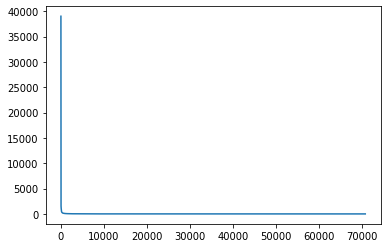

In [0]:
#frequency plot

#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(word_frequency)), word_frequency['count'])
plt.show()

This plot is not making sense. Why?? Is it because the words are too many on the x axis?




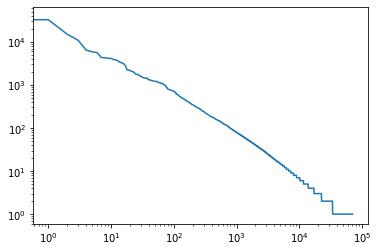

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(word_frequency)), word_frequency['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

(This shows that likelihood of a word occurring is inversely proportional to its rank. This effect is called Zipf's Law, and suggests that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency) resulting in a linear relationship.)

In [0]:
#now I will use nltk to do some analysis
import nltk



## load stop_words_list


In [0]:


HGDstopwords = []
stopwords_path = wd +'hagonda_stop_word.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
  for line in f:
    if len(line)>0:
      HGDstopwords.append(line.strip())




## normalize and ch_tokenize function


In [0]:
# normalize tokens 
# if it's not a stop word or punctuation mark, add to the list
# extra_stop = ["#", "Âêß", "Âïä","Âë¢"]

def normalizeTokens(word_list, stop_words_freq=None):
    #We can use a generator here as we just need to iterate over it
    normalized = []

    for word in word_list:
        # if it's not a stop word or punctuation mark, add it to our article
        if stop_words_freq and word in stop_words_freq and len(word)>0: 
          continue
        else:
          if (len(word.strip()) > 0):
            normalized.append(word)

    return normalized


In [0]:
def ch_tokenize(s):
  tokenized_words = list(jieba.tokenize(s))
  token_list = [element[0] for element in tokenized_words]
  normalized = [x for x in normalizeTokens(token_list, HGDstopwords) if len(x) > 0 ]
  return normalized

In [0]:
# apply the normalizeTokens function to the new_tweets_df
# note that I have not applied lemmenization; I only filtered out the stop words; Spacy and NLTK currently do not work for the lemmenization of Chinese texts. 
new_tweets_df['normalized_tokens'] = new_tweets_df['tokenize_words'].apply(lambda x: normalizeTokens(x, HGDstopwords))
new_tweets_df.head()


_id  ...                                  normalized_tokens
0  1980768563_Iw9dilFaJ  ...                              [ËÆ∞Âæó, ÂÖ≥Ê≥®, Â∑•, x, Âè∑, ÊµÆ‰∫ë]
1  1980768563_Iy1lKeTGg  ...  [ÊòéÂ§©, Êõ¥Êñ∞, Â∑≤Áªè, Â∑Æ‰∏çÂ§ö, 5000, Â≠ó, ËøòË¶Å, ÊòéÂ§©, Êõ¥Êñ∞, Êï∞ÊçÆ, Ë°•ÂÖÖ,...
2  1980768563_Iy1iKDvHR  ...                         [Ë∞¢Ë∞¢, Ë∞¢Ë∞¢‰Ω†‰ª¨, Â•âÁåÆ, ÁúüÁöÑ, ÊÑü‰∫∫, ZH]
3  1980768563_Iy19ymfjm  ...  [Ê¨ßÊ¥≤, Â∞æÁõò, ÂèçÂºπ, ÂéüÊù•, Ëâπ, Ë∑≥Ê∞¥, 3%, Ë∑åÂà∞, 2%, ËøôÂè£, ÊØíÂ•∂, Ê¨ßÊ¥≤...
4  1980768563_Iy13sbx39  ...  [Ëâπ, Ë∑≥Ê∞¥, 3%, Ë∑åÂà∞, 2%, ËøôÂè£, ÊØíÂ•∂, Ê¨ßÊ¥≤, ‰∏âÂ§ßËÇ°, Ê≤°, ÂÆà‰Ωè, ËÇ°Â∏Ç...

[5 rows x 21 columns]

In [0]:
print(len('ÂíñÂï°ÂéÖ'))
print(len('Èáå'))

3
1


In [0]:
#.sum() adds together the lists from each row into a single list
tweetsdist = nltk.ConditionalFreqDist(((len(w), w) for w in new_tweets_df['normalized_tokens'].sum()))

#print the number of words
print(tweetsdist.N())

490196


In [0]:
list(tweetsdist[5])[:10]

['.....',
 '50000',
 'Âç∞Â∫¶Â∞ºË•ø‰∫ö',
 'ÁóÖÊØíÊÑüÊüìËÄÖ',
 'Bonds',
 '0.265',
 'Ê¨†ÂèëËææÂõΩÂÆ∂',
 '12500',
 '47.8%',
 '52.2%']

In [0]:
tweetsCProb = nltk.ConditionalProbDist(tweetsdist,nltk.ELEProbDist)

# print the most common 3 character word and its probability
print("The most common 3 character word is: ")
print(tweetsCProb[3].max())
print("And its probabilty is: ")
print(tweetsCProb[3].prob(tweetsCProb[3].max()))



The most common 3 character word is: 
cry
And its probabilty is: 
0.009577253195179339


In [0]:
# print the most common 4 character word
print("The most common 4 character word is: ")
print(tweetsCProb[4].max())
print("And its probabilty is: ")
print(tweetsCProb[4].prob(tweetsCProb[4].max()))

print("------------------------")
# print the most common 2 character word
print("The most common 2 character word is: ")
print(tweetsCProb[2].max())
print("And its probabilty is: ")
print(tweetsCProb[2].prob(tweetsCProb[2].max()))

The most common 4 character word is: 
good
And its probabilty is: 
0.007648066568771415
------------------------
The most common 2 character word is: 
‰∏≠ÂõΩ
And its probabilty is: 
0.011051224103727775


## word cloud 


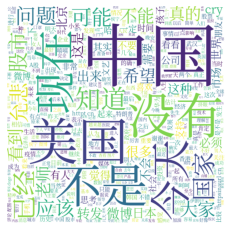

In [0]:
#draw word cloud 
import wordcloud #Makes word clouds
wc = wordcloud.WordCloud(font_path= wd +'Noto_Serif_SC/NotoSerifSC-Regular.otf', background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(new_tweets_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig(wd + "Weibo_tweets_word_cloud.pdf", format = 'pdf')

From the Word Cloud, we ssee that China is the most frequent word. US also occurs fairly frequently. Other words that of interest to my project are "ÂõΩÂÆ∂" ÔºànationÔºâ.

In [0]:
# bigrams, trigrams, quadgrams, higher-order ngrams and skipgrams

identify statistically significant bigrams, trigrams, quadgrams, higher-order ngrams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

In [0]:
# look at bigrams
tweetsBigrams = nltk.collocations.BigramCollocationFinder.from_words(new_tweets_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(tweetsBigrams.N))

There are 490196 bigrams in the finder


In [0]:
def bigramScoring(count, wordsTuple, total):
    return count

print(tweetsBigrams.nbest(bigramScoring, 10))

[(' ', ' '), (' ', '9'), ('9', 'Âº†'), ('ËΩ¨Âèë', 'ÂæÆÂçö'), (' ', '3'), (' ', 'ÊñáËâ∫'), ('Á¨ë', 'cry'), ('ÊñáËâ∫', ' '), ('3', 'Âº†'), (' ', '‰æØÂÆÅ')]


In [0]:
# association in bigrams using likelihood ratio

bigram_measures = nltk.collocations.BigramAssocMeasures()
tweetsBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[((' ', ' '), 22423.68882137467),
 (('Á¨ë', 'cry'), 6064.026513528728),
 (('ËΩ¨Âèë', 'ÂæÆÂçö'), 5312.800787914119),
 (('9', 'Âº†'), 5199.483580804831),
 (('httpt', 'cn'), 4090.099493506366),
 (('httpsinaurl', 'cn'), 3762.9239334895174),
 (('3', 'Âº†'), 3616.8238927401094),
 (('üê≤', 'üê≤'), 2976.304480334781),
 (('Áßí', 'Êãç'), 2630.537457595168),
 (('ËØÑËÆ∫', 'ÈÖçÂõæ'), 2302.7888158813325),
 (('Êü•Áúã', 'ÂõæÁâá'), 2202.356705883208),
 (('Âñµ', 'Âñµ'), 2153.1062824919077),
 ((' ', 'ÊñáËâ∫'), 2105.111467102444),
 (('Êåñ', 'Èºª'), 1997.2945253875687),
 (('ÊñáËâ∫', ' '), 1884.8240703084082),
 ((' ', '9'), 1725.8541077202167),
 (('37', 'Âú∞‰∫ß'), 1621.4927455620332),
 (('‰æØ', 'ËÄÅÂ∏à'), 1616.2448197455622),
 (('---', '37'), 1544.931395131394),
 (('Â∞èÁ±≥', '10'), 1531.1055528469362),
 (('‰∏ç', 'Áü•ÈÅì'), 1511.0744369123013),
 (('‰æØÂÆÅ', 'ÂæÆÂçö'), 1474.211432412511),
 (('6', 'Âº†'), 1383.5313246235446),
 (('\u3000', '\u3000'), 1343.6563643956722),
 (('Â§¥Êù°', 'ÊñáÁ´†'), 1243.934120044

From above we can see that there are still many words that needs to be taken out such as punctuations, httpt, httpsinaurl, \u3000, [, ‚Üí, ---, and also emoji's. 


In [0]:
## Part of Speech, Name Entity Recognition, Dependency parsing and graph representation

# Cluster Analysis

## tf-idf

In [0]:
# sklearn‰∏≠ÁöÑCountVectorizerÂèØ‰ª•ÂÆûÁé∞Â∞ÜÊñáÊú¨ËΩ¨Êç¢‰∏∫Á®ÄÁñèÁü©ÈòµÔºåÊ≠§Â§ÑËæìÂÖ•ÁöÑ‰∏≠ÊñáÊñáÊú¨ÂøÖÈ°ªÊòØË¶ÅÂÖàÂàÜÂ•ΩËØçÂÜçÊåâÁ©∫Ê†ºÂàÜÈöî ÂêàÂπ∂‰∏∫‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤ÊâçÂèØ‰ª•


In [0]:
#filter by tf-idf
#create count vectorizer
#CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#font_path = NotoSerifSC-Regular.otf

#try countVectorizer to transform the content column
CountVectorizer=sklearn.feature_extraction.text.CountVectorizer(lowercase=False, tokenizer = ch_tokenize) #initialize the countvectorizer



In [0]:
tweetsVects = CountVectorizer.fit_transform(new_tweets_df['content']) #train
tweetsVects
print(tweetsVects.shape)

(22800, 70218)


In [0]:
print(CountVectorizer.vocabulary_.get('Áñ´ÊÉÖ'))

49219


In [0]:

print(CountVectorizer.vocabulary_.get('‰∏≠ÂõΩ'))

7550


In [0]:
tweetsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(tweetsVects) #initialize
tweetsTF = tweetsTFTransformer.transform(tweetsVects) #train
print(tweetsTF.shape)

(22800, 70218)


In [0]:
list(zip(CountVectorizer.vocabulary_.keys(), tweetsTF.data))[:20] 

[('ËÆ∞Âæó', 0.335995680675533),
 ('ÂÖ≥Ê≥®', 0.4568145802129887),
 ('Â∑•', 0.48887460475595684),
 ('x', 0.3189740837585819),
 ('Âè∑', 0.29860384582065047),
 ('ÊµÆ‰∫ë', 0.4985180436538016),
 ('ÊòéÂ§©', 0.11143484655869688),
 ('Êõ¥Êñ∞', 0.13949720720238803),
 ('Â∑≤Áªè', 0.1646989794889148),
 ('Â∑Æ‰∏çÂ§ö', 0.2264061528452635),
 ('5000', 0.17633894292377403),
 ('Â≠ó', 0.14371880804915274),
 ('ËøòË¶Å', 0.21476618941040426),
 ('Êï∞ÊçÆ', 0.18317729699262844),
 ('Ë°•ÂÖÖ', 0.1120795585518344),
 ('‰ø°ÊÅØ', 0.12387092831928218),
 ('2', 0.1515884045748527),
 ('24', 0.34353269246274154),
 ('Á¨¨‰∏ÄÊù°', 0.25728260361515976),
 ('140', 0.13851346151984043)]

In [0]:
TweetsTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False, tokenizer = ch_tokenize, max_df=0.5, max_features=1000, min_df=3, norm='l2')
#train
TweetsTFVects = TweetsTFVectorizer.fit_transform(new_tweets_df['content'])

In [0]:
print(TweetsTFVects.shape)

(22800, 1000)


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('‰∏≠ÂõΩ'))

118


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('Áñ´ÊÉÖ'))

738


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('ÁæéÂõΩ'))

810


In [0]:
try:
    print(TweetsTFVectorizer.vocabulary_['‰∏≠ÂõΩ'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(TweetsTFVectorizer.vocabulary_.keys())[:10]))

118


## flat clustering with k-means

In [0]:
 new_tweets_df['label'].unique()

array(['ÂΩ±ËØÑ,ÁßªÂä®‰∫íËÅîÁΩë,ÂïÜ‰∏ö', 'ÂæóÁëü,Â§©Áß§Â∫ß', nan, 'Â§©‰ΩøÊäïËµÑ,Â∞èÁ±≥ÊâãÊú∫,Êàë‰ª¨ÈÉΩÁà±Áî®Á±≥ËÅä', 'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±',
       'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±', 'ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø', 'Êñ∞Èóª,ÁΩëÁªú,ÊñáÂ≠ó', '‰∫∫Ê∞ëÊó•Êä•'], dtype=object)

I will create a new dataframe using 4 labels from new_tweets_df to do flat clustering with k-means
The four labels I chose for this analysis are: "ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø", "‰∫∫Ê∞ëÊó•Êä•", "ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±", "'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±".
The first label is associated the weibo account of a user who comments on the stock market, the second one is the official account of the newspaper agency "people's daily", the 3rd and 4th labels are associated with users who self-identified as authors and scholars. Their corresponding user_Id's are 1483330984, 2803301701, 1263406744, 1280463227

In [0]:
KmCategories = ['ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø', '‰∫∫Ê∞ëÊó•Êä•', 'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±', 'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±']

In [0]:

Name_filter = new_tweets_df['user_id'].isin([1483330984, 2803301701, 1263406744, 1280463227])
km_tweets_df = new_tweets_df[Name_filter].sort_values(['label'])

In [0]:
km_tweets_df.head()

_id  ...                                     reduced_tokens
5366  2803301701_IxDx49uXl  ...                                      [3, ÈáçË¶Å, 3, Âº†]
5365  2803301701_Ixu83vlQO  ...                                                 []
550   1280463227_Iy4Kw6cOy  ...                [‰∫∫, ‰∏çÊòØ, Âè™, ÊúÄ, ËØª‰π¶, ÊñáËâ∫, ‰∏ÄËµ∑, ËØª‰π¶, 9, Âº†]
3542  1280463227_Iu64wjanL  ...                                         [ÊñáËâ∫, 9, Âº†]
3540  1280463227_ItT654F6X  ...  [Â∞è, Ë∞ÉÊü•, Áñ´ÊÉÖ, ÁõÆÂâç, ÊúÄ, ÂÖ≥Ê≥®, ‰∫ãÊÉÖ, Áñ´ÊÉÖ, Âá∫Áé∞, 3, ÊúÄÊñ∞, Áñ´ÊÉÖ, ...

[5 rows x 22 columns]

In [0]:
len(km_tweets_df)

20612

In [0]:
#train
kmTweetsTFVects = TweetsTFVectorizer.fit_transform(km_tweets_df['content'])

In [0]:
print(set(km_tweets_df['label']))

{'ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø', 'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±', 'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±', '‰∫∫Ê∞ëÊó•Êä•'}


In [0]:
# number of clusters
KMnumClusters = len(set(km_tweets_df['label']))
print(KMnumClusters)

4


In [0]:
#cluster using k means
tweetsKM = sklearn.cluster.KMeans(n_clusters = KMnumClusters, init='k-means++')
tweetsKM.fit(kmTweetsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print("For tweets km clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(km_tweets_df['label'], tweetsKM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(km_tweets_df['label'], tweetsKM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(km_tweets_df['label'], tweetsKM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(km_tweets_df['label'], tweetsKM.labels_)))

For tweets km clusters:
Homogeneity: 0.144
Completeness: 0.103
V-measure: 0.120
Adjusted Rand Score: 0.151


In [0]:
km_tweets_df['kmeans_predictions'] = tweetsKM.labels_
km_tweets_df.sample()

_id  ... kmeans_predictions
7750  1483330984_Iay7twlDj  ...                  0

[1 rows x 22 columns]

In [0]:
terms = TweetsTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = tweetsKM.cluster_centers_.argsort()[:, ::-1]
for i in range(KMnumClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 ‰∏≠ÂõΩ
 ‰∏ç
 ‰∫∫
 ËØ¥
 Â•Ω
 Ëøò
 ÂÖÅÊÇ≤
 Áúã
 Ê≤°
 Â§ß


Cluster 1:
 Âº†
 9
 3
 ÊñáËâ∫
 6
 ËØª‰π¶
 ‰∫∫
 ÊôöÂÆâ
 ‰∏ç
 ÂñúÈπä


Cluster 2:
 Á¨ë
 cry
 ‰∏çËØ≠
 Âùè
 ‰∏ç
 Áúã
 ËØ¥
 Ëøò
 Ê≤°
 Â•Ω


Cluster 3:
 ÂæÆÂçö
 ËΩ¨Âèë
 ‰æØÂÆÅ
 ‰∏ç
 ‰∏≠ÂõΩ
 ‰∫∫
 Ëøò
 Ê≠¶Ê±â
 Â•Ω
 ÊôöÂÆâ




In [0]:
#PCA dimension reduction

KMPCA = sklearn.decomposition.PCA(n_components = 2).fit(kmTweetsTFVects.toarray()) # n_components = 2 -- makes the graph two dimensional 
KMreducedPCA_data = KMPCA.transform(kmTweetsTFVects.toarray())

# colors = list(plt.cm.rainbow(np.linspace(0,1, KMnumClusters)))
# colors_p = [colors[l] for l in tweetsKM.labels_]

In [0]:
colordict = {
'ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø': 'red',
'‰∫∫Ê∞ëÊó•Êä•': 'yellow',
'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±': 'green',
'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±': 'blue',
    }
colors = [colordict[c] for c in km_tweets_df['label']] #['red','red',....'orange']
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø', 'red'), ('‰∫∫Ê∞ëÊó•Êä•', 'yellow'), ('ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±', 'green'), ('Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±', 'blue')])


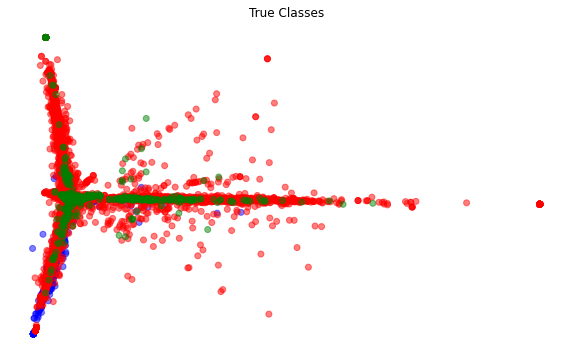

In [0]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [0]:
components = KMPCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

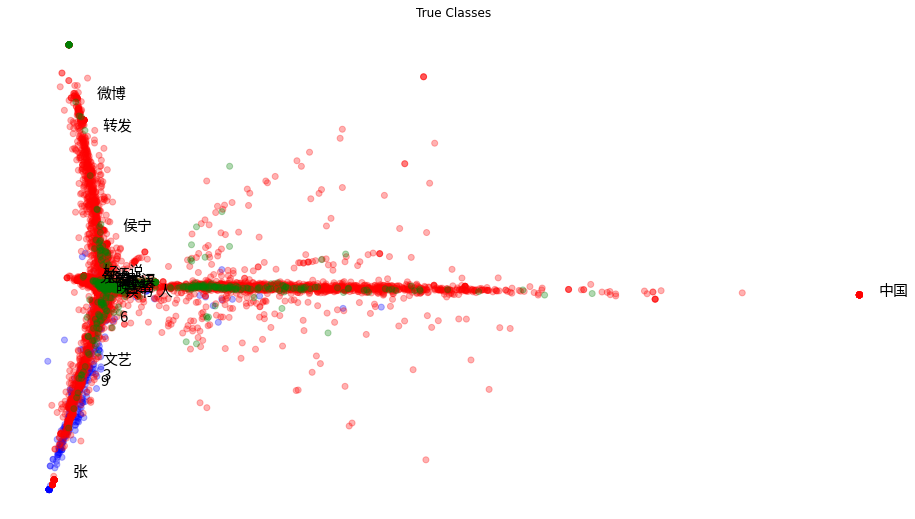

In [0]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]), fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

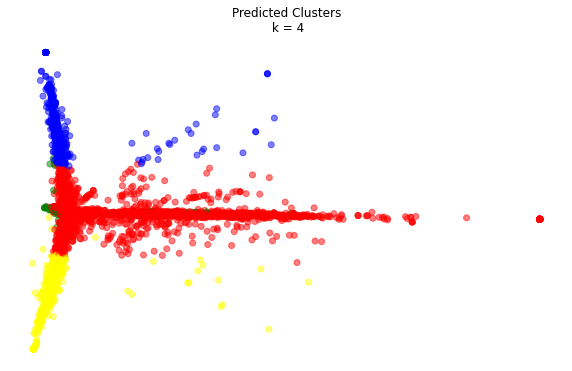

In [0]:
# for predicted clusters

colors_p = [colordict[KmCategories[l]] for l in tweetsKM.labels_]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 4')
plt.show()

## Silhouette

In [0]:
# selecting cluster number
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = KMPCA.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


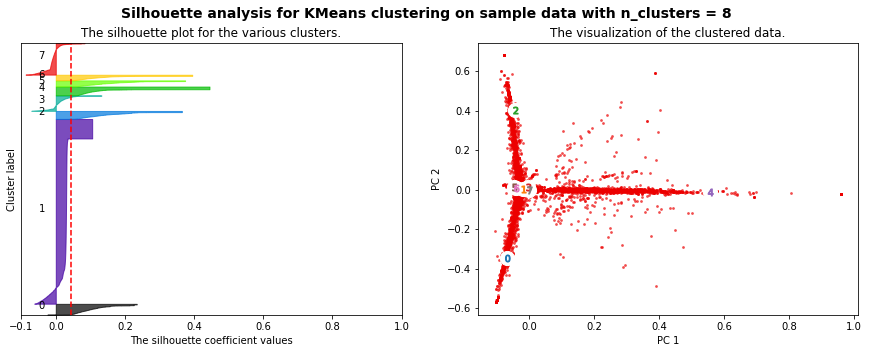

For n_clusters = 8, The average silhouette_score is : 0.044


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(8, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


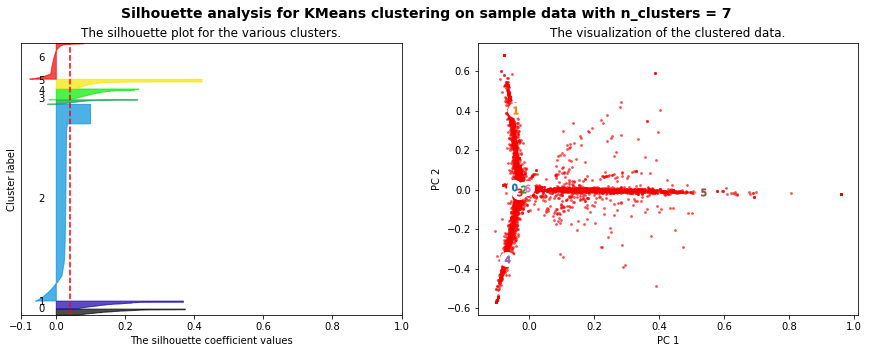

For n_clusters = 7, The average silhouette_score is : 0.041


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(7, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


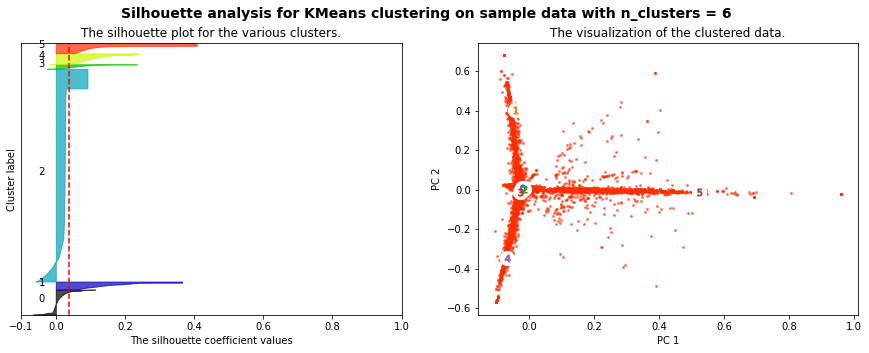

For n_clusters = 6, The average silhouette_score is : 0.038


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(6, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


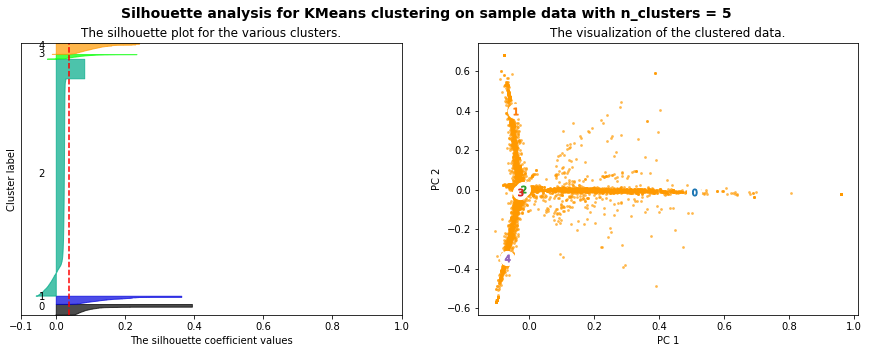

For n_clusters = 5, The average silhouette_score is : 0.037


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


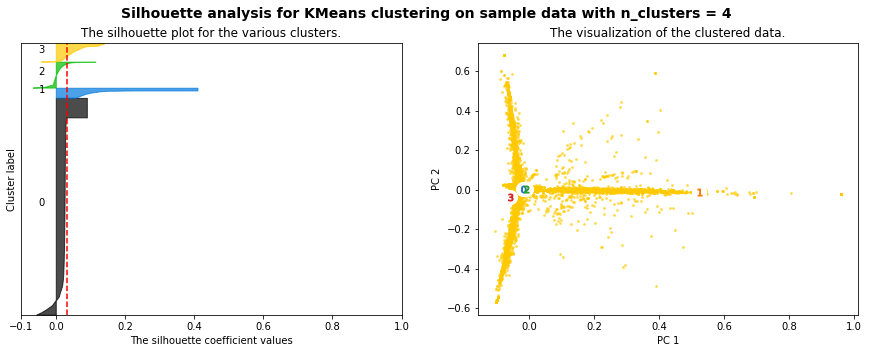

For n_clusters = 4, The average silhouette_score is : 0.032


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


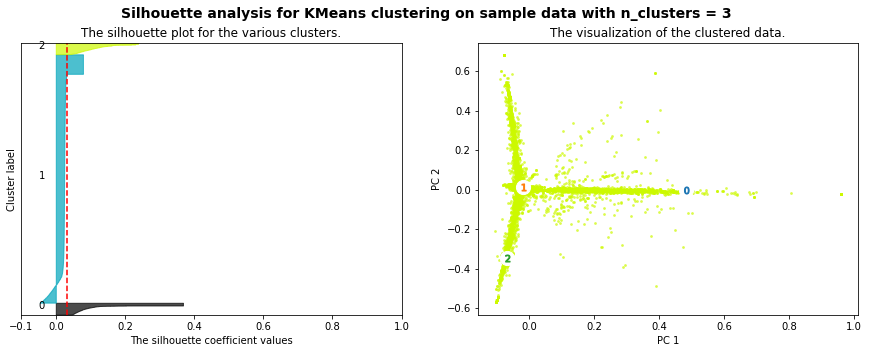

For n_clusters = 3, The average silhouette_score is : 0.034


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


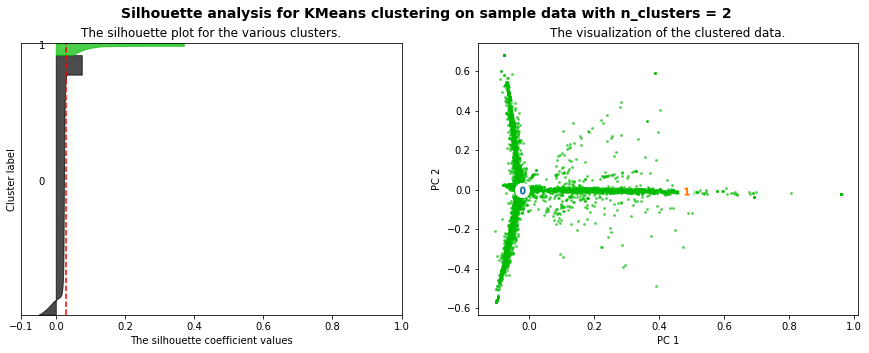

For n_clusters = 2, The average silhouette_score is : 0.030


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(2, X)

Interestingly, the sihouette analysis above shows that within 4 clusters, 3 clusters has the highest average sillouette score. This seems to makes sense because two of the labels are both authors/scholars. Moreover, when clusters are more than 4, the larger the number of the clusters, the higher the score. 

However, these results are doubtful given the fact that the top terms distuished by k-means are largely jibberish words instead of words that are truly discriminating.

## Hierarchical Clustering

In [0]:
kmTweetsTFVects

<20612x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 132001 stored elements in Compressed Sparse Row format>

In [0]:
kmTweetsTFVects[:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
kmTweetsCoocMat = kmTweetsTFVects * kmTweetsTFVects.T


In [0]:
kmTweetsCoocMat.setdiag(0) 

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [0]:
km_tweets_df.head()

_id  ... kmeans_predictions
5366  2803301701_IxDx49uXl  ...                  1
5365  2803301701_Ixu83vlQO  ...                  0
550   1280463227_Iy4Kw6cOy  ...                  1
3542  1280463227_Iu64wjanL  ...                  1
3540  1280463227_ItT654F6X  ...                  0

[5 rows x 22 columns]

In [0]:
set(km_tweets_df['label'])

{'‰∫∫Ê∞ëÊó•Êä•', 'Â•Ω‰π¶,ÂéÜÂè≤,ÁúãÁîµÂΩ±', 'ÊßêËä±Ëõá,Ë¥¢ÂØåËãçÁîü,ËÇ°Â∏ÇË∂ãÂäø', 'ËØª‰π¶,ÂπΩÈªò,Ëá™Áî±'}

In [0]:
# compute a tree of nested clusters & look at first 50 texts of each class
selectIndices = []
indexToCat = []
for c in set(km_tweets_df['label']):
    selectIndices += list(km_tweets_df[km_tweets_df['label'] == c].index)[:50] #if newsgroupsDF['category'] == c
    indexToCat += [c] * 50
    #.groupby('category').sum()



In [0]:
subCoocMat = kmTweetsCoocMat[selectIndices,:][:,selectIndices]

In [0]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[  8.,  39.,   0.,   2.],
       [ 43., 152.,   0.,   3.],
       [ 44., 153.,   0.,   4.],
       [ 46., 154.,   0.,   5.],
       [ 49., 155.,   0.,   6.],
       [ 50., 156.,   0.,   7.],
       [ 53., 157.,   0.,   8.],
       [ 57., 158.,   0.,   9.],
       [ 67., 159.,   0.,  10.],
       [ 69., 160.,   0.,  11.]])

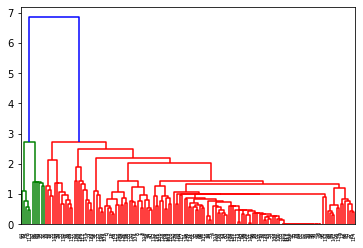

In [0]:
#visualize the tree
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)


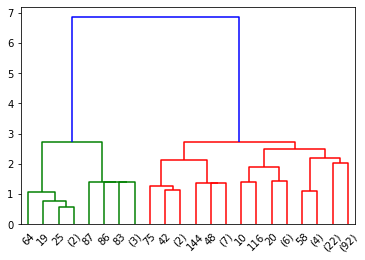

In [0]:
# visualize the tree after truncating
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

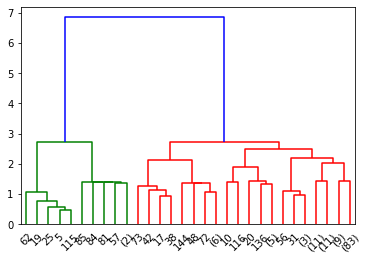

In [0]:
# visualize the tree 
dendrogramDat2 = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=5, truncate_mode='level', get_leaves=True)

In [0]:
## fcluster
# hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 4, 'maxclust')
# hierarchicalClusters

In [0]:
# linkage_matrix_full = scipy.cluster.hierarchy.ward(kmTweetsCoocMat.toarray())
# hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
# print("For our complete clusters:")
# print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(km_tweets_df['label'], hierarchicalClusters_full)))

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [0]:
# # wald_predictions vs. k-means
# km_tweets_df['label'] = hierarchicalClusters_full
# km_tweets_df.head()

## Topic Modeling

In [0]:
# create corpus and create a column with only tokens from TweetsTFVectorizer's vocabulary

def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab] # for word in wordlst, if word in vocab, return w

new_tweets_df['reduced_tokens'] = new_tweets_df['normalized_tokens'].apply(lambda x: dropMissing(x, TweetsTFVectorizer.vocabulary_.keys()))

In [0]:
def join_tweets(tokenized_word_lists):
  joined_token_list = []
  for token_list in tokenized_word_lists:
    for token in token_list:
      joined_token_list.append(token)
  return joined_token_list

In [0]:
topicm_df = new_tweets_df.groupby(['year']).agg(all_reduced_tokens=('reduced_tokens',join_tweets))



In [0]:
topicm_df.head()

all_reduced_tokens
year                                                   
2009  [ÊàêÂäü, httpsinaurl, cn, ‰∏≠ÂõΩ, ‰∫∫, httpsinaurl, cn, ...
2010  [Â§ß, httpsinaurl, cn, Ê•ºÂ∏Ç, Â§ß, httpsinaurl, cn, ËÇ°...
2011  [ÊîØÊåÅ, ‰ªäÂ§©, Â∫îËØ•, ÂøÉ, ‰∏ç, ‰∫∫, ÂëµÂëµ, Èí±, Â•Ω, ÂáÜÂ§á, Â•Ω, Êó©, ÂøÉ, ËÉå...
2012  [Ëøô‰Ωç, Â§ü, Âçñ, Áü•ÈÅì, ËÇ°Á•®, ÂÖ∂ÂÆû, ÂÅö, ÈÄâÊã©, Áæé, ‰∏çÊòØ, ÂÅ∑Á¨ë, ËÇ°Â∏Ç, Áúã...
2013  [Â§ÆËßÜ, ËØ¥, ËØ¥, Áúã, ËØ¥, ËΩ¨Âèë, ÂæÆÂçö, ËΩ¨Âèë, ÂæÆÂçö, ‰∏ÄËµ∑, ËÄÅ, Â∏¶, ‰∏Ä‰∏ã,...

In [0]:
topicm_df.index

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='year')

In [0]:
dictionary = gensim.corpora.Dictionary(topicm_df['all_reduced_tokens'])

In [0]:
corpus = [dictionary.doc2bow(text) for text in topicm_df['all_reduced_tokens']]

In [0]:
# serialize the corpus and load it (for large corpus)
gensim.corpora.MmCorpus.serialize((wd + 'sina_export_3_18/tweets_copy.json'), corpus)
tweetscorpus = gensim.corpora.MmCorpus((wd + 'sina_export_3_18/tweets_copy.json'))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#lda model
tweetslda = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto') # initialize the ldamodel

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
print(tweetslda)

LdaModel(num_terms=1000, num_topics=10, decay=0.5, chunksize=2000)


In [0]:
# create a dataframe for lda topics
ldaDF = pd.DataFrame({
        'year' : topicm_df.index,
        'topics' : [tweetslda[dictionary.doc2bow(l)] for l in topicm_df['all_reduced_tokens']] #value of 'topics' - for each token in "reduced_tokens" column, apply the the doc2bow function to each token, and then apply the senlda model 
    }) # make the dictionary a dataframe;

In [0]:
ldaDF.head()

year                                             topics
0  2009  [(4, 0.39895052), (6, 0.26110318), (7, 0.33845...
1  2010  [(0, 0.06166526), (1, 0.049809586), (2, 0.0398...
2  2011  [(0, 0.12330843), (1, 0.07135678), (2, 0.10432...
3  2012  [(0, 0.101281814), (1, 0.23295961), (2, 0.0782...
4  2013  [(0, 0.20137192), (1, 0.1357229), (2, 0.188412...

In [0]:
#make each topic its own column
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(tweetslda.num_topics)} # *len(ldaDF) so that each topic column has the length of 999.
                      # [0] * len(ldaDF) to make sure topicsProbDict[topicNum][index] can refer to the index in the list [0] * len(ldaDF)
#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob   #replace each [0] with a corresponding prob

#Update the DataFrame
for topicNum in range(tweetslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum] #append the ldaDF with the topic_{} columns

ldaDF[:10] #[start_ind : end_index : step_size] # [1:900:10]

year                                             topics  ...   topic_8   topic_9
0  2009  [(4, 0.39895052), (6, 0.26110318), (7, 0.33845...  ...  0.000000  0.000000
1  2010  [(0, 0.06166526), (1, 0.049809586), (2, 0.0398...  ...  0.047982  0.011306
2  2011  [(0, 0.12330843), (1, 0.07135678), (2, 0.10432...  ...  0.145515  0.026403
3  2012  [(0, 0.101281814), (1, 0.23295961), (2, 0.0782...  ...  0.144236  0.046231
4  2013  [(0, 0.20137192), (1, 0.1357229), (2, 0.188412...  ...  0.113549  0.038371
5  2014  [(0, 0.17884572), (1, 0.13211265), (2, 0.28736...  ...  0.134782  0.027890
6  2015  [(0, 0.09968609), (1, 0.14370205), (2, 0.09782...  ...  0.166111  0.076127
7  2016  [(0, 0.12370361), (1, 0.13559547), (2, 0.08615...  ...  0.109327  0.082382
8  2017  [(0, 0.16202953), (1, 0.14791793), (2, 0.09076...  ...  0.079731  0.063451
9  2018  [(0, 0.16115995), (1, 0.07946166), (2, 0.14910...  ...  0.059618  0.062746

[10 rows x 12 columns]

In [0]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]] # ['topic_%d' %x for x in range(10)] is more efficient way to get all the columns that starts with topics_
ldaDFVisN = ldaDF[:10][['year']]
ldaDFVis = ldaDFV.as_matrix(columns=None) # convert dataframe series to numpy array
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None) #convert dataframe series to numpy array
ldaDFV

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


topic_0   topic_1   topic_2  ...   topic_7   topic_8   topic_9
0  0.000000  0.000000  0.000000  ...  0.338460  0.000000  0.000000
1  0.061665  0.049810  0.039817  ...  0.198318  0.047982  0.011306
2  0.123308  0.071357  0.104322  ...  0.096184  0.145515  0.026403
3  0.101282  0.232960  0.078244  ...  0.095082  0.144236  0.046231
4  0.201372  0.135723  0.188413  ...  0.059319  0.113549  0.038371
5  0.178846  0.132113  0.287364  ...  0.034341  0.134782  0.027890
6  0.099686  0.143702  0.097825  ...  0.085416  0.166111  0.076127
7  0.123704  0.135595  0.086158  ...  0.101224  0.109327  0.082382
8  0.162030  0.147918  0.090767  ...  0.088980  0.079731  0.063451
9  0.161160  0.079462  0.149102  ...  0.058939  0.059618  0.062746

[10 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


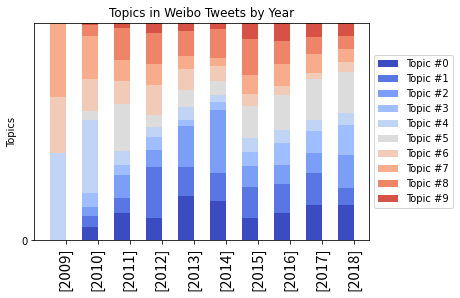

In [0]:
# visualization with bar chart

N = 10
ind = np.arange(N)
K = tweetslda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Weibo Tweets by Year')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical',fontproperties= fontprop )

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


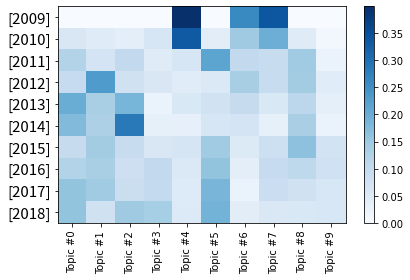

In [0]:
# heat map

#for reference:
#ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]] # ['topic_%d' %x for x in range(10)] is more efficient way to get all the columns that starts with topics_
#ldaDFVisN = ldaDF[:10][['name']]
#ldaDFVis = ldaDFV.as_matrix(columns=None) # convert dataframe series to numpy array (IDaDFVis is the first 10 samples' 10 topic columns)
#ldaDFVisNames = ldaDFVisN.as_matrix(columns=None) #convert dataframe series to numpy array
#ldaDFV

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames, fontproperties= fontprop);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Bront√´)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [0]:
tweetslda.show_topic(1)

[('‰∏ç', 0.022627011),
 ('‰∫∫', 0.017733447),
 ('‰∏≠ÂõΩ', 0.014994687),
 ('ËØ¥', 0.014506761),
 ('Ëøò', 0.013018758),
 ('Áúã', 0.009392524),
 ('ÁæéÂõΩ', 0.0086749345),
 ('Â•Ω', 0.008360811),
 ('Âº†', 0.007702195),
 ('Â§ß', 0.0075610206)]

In [0]:
tweetslda.show_topic(4)

[('‰∏≠ÂõΩ', 0.023810176),
 ('‰∫∫', 0.01989841),
 ('ËØ¥', 0.014534478),
 ('‰∏ç', 0.012795675),
 ('ÁæéÂõΩ', 0.009823667),
 ('Ëøò', 0.008553782),
 ('Â•Ω', 0.008225353),
 ('Âº†', 0.008222639),
 ('Áúã', 0.008132564),
 ('‰∏çÊòØ', 0.007880633)]

In [0]:
topicsDict = {}
for topicNum in range(tweetslda.num_topics): # topic number = 0
    topicWords = [w for w, p in tweetslda.show_topic(topicNum)] # toppicwords = for word, prob in senlda.show_topic(0), return words
    topicsDict['Topic_{}'.format(topicNum)] = topicWords # topicsDict['Topic_0'] = topicWords
                                                       # As such, the 'for' loop maps each topic_{} to each sets of words in that topic
                                                      # the topicsDict looks like {'topic_0': 'fund', 'worker', ....; 'topic_1':'loan','fund', .... ; }
    

wordRanksDF = pd.DataFrame(topicsDict) # turn dictionary into a pandas dataframe
wordRanksDF

#We can see that several of the topics have the same top words, but there are definitely differences. We can try and make the topics more distinct by changing the $\alpha$ and $\eta$ parameters of the model. $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings.

Topic_0 Topic_1 Topic_2 Topic_3  ... Topic_6 Topic_7 Topic_8 Topic_9
0       ‰∏ç       ‰∏ç       ‰∏ç       ‰∏ç  ...       ‰∏ç      ‰∏≠ÂõΩ       ‰∏ç       ËØ¥
1      ‰∏≠ÂõΩ       ‰∫∫      ‰∏≠ÂõΩ      ‰∏≠ÂõΩ  ...       ‰∫∫       ‰∏ç      ‰∏≠ÂõΩ       ‰∫∫
2       ËØ¥      ‰∏≠ÂõΩ       ‰∫∫       ËØ¥  ...      ‰∏≠ÂõΩ       ‰∫∫       ‰∫∫       ‰∏ç
3       ‰∫∫       ËØ¥       ËØ¥       ‰∫∫  ...       Ëøò       ËØ¥       ËØ¥      ‰∏≠ÂõΩ
4       Ëøò       Ëøò       Â•Ω       Ëøò  ...       ËØ¥       Ëøò       Â•Ω       Ëøò
5      ÁæéÂõΩ       Áúã       Ëøò       Â•Ω  ...       Â•Ω       Â•Ω      Ê≤°Êúâ       Â•Ω
6       Áúã      ÁæéÂõΩ      ÁæéÂõΩ      ÁæéÂõΩ  ...      ÁæéÂõΩ       Áúã       Ê≤°       Áúã
7       Âº†       Â•Ω      Ê≤°Êúâ       Áúã  ...       Â§ß      ‰∏çÊòØ       Âº†       Âº†
8       Â•Ω       Âº†       Áúã      ËÇ°Â∏Ç  ...      ÂæÆÂçö      Ê≤°Êúâ       Â§ß      ÁæéÂõΩ
9      ‰∏çÊòØ       Â§ß       Âº†       Â§ß  ...      Ê≤°Êúâ      ‰ªäÂ§©       Ëøò      Ê≤°Êúâ

[10 rows x 10 columns]

<Figure size 432x288 with 0 Axes>

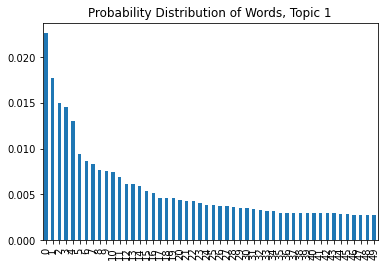

In [0]:
#plot the top 50 words associated with the topic 1
topic1_df = pd.DataFrame(tweetslda.show_topic(1, topn=50)) # 1 is the topic ID
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [0]:
tweetslda1 = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, eta = 0.00001)
tweetslda2 = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, eta = 0.9)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


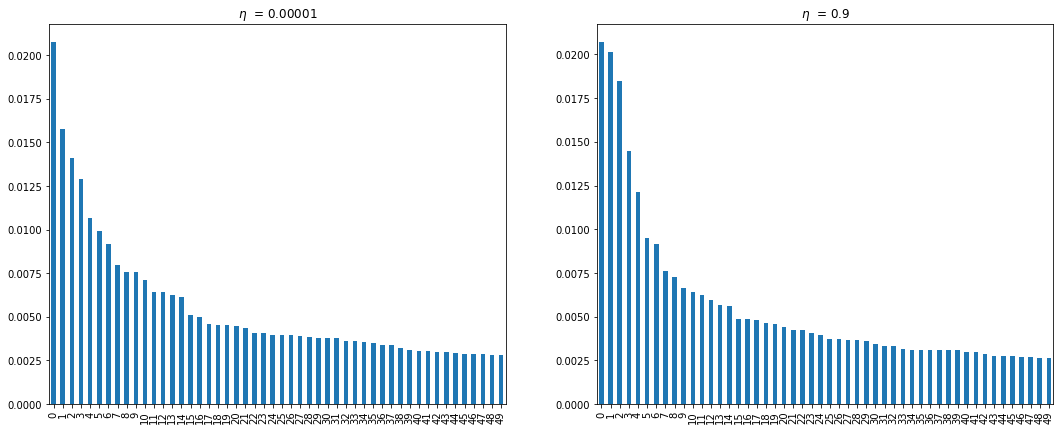

In [0]:
topic11_df = pd.DataFrame(tweetslda1.show_topic(1, topn=50))
topic21_df = pd.DataFrame(tweetslda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

In [0]:
## Dynamic topic models

# Word Embedding


## word2vec model

In [0]:
#train the data with word2vec; new_tweets_df['normalized_tokens']
tweets_W2V_model = gensim.models.word2vec.Word2Vec(new_tweets_df['normalized_tokens'], hs=1, negative = 0)


In [0]:
numwords = 50
tweets_w2v_Words = tweets_W2V_model.wv.index2word[:numwords]

In [0]:
print(tweets_w2v_Words)

['‰∏ç', '‰∏≠ÂõΩ', '‰∫∫', 'ËØ¥', 'Ëøò', 'Â•Ω', 'ÁæéÂõΩ', 'Áúã', 'Ê≤°Êúâ', 'Âº†', 'Â§ß', '‰∏çÊòØ', 'Ê≤°', 'ÂæÆÂçö', 'Áé∞Âú®', '‰ªäÂ§©', '‰∏≠', 'ËÇ°Â∏Ç', 'ÂÅö', '3', 'Â∑≤Áªè', 'ÂõΩÂÆ∂', 'Áü•ÈÅì', 'ÊúÄ', 'ÈóÆÈ¢ò', '9', 'ÊÉ≥', 'Â§ßÂÆ∂', 'Á¨ë', 'ÂèØËÉΩ', 'ÂÖÅÊÇ≤', '2', 'ÂêÉ', 'Â∫îËØ•', 'ËΩ¨Âèë', 'cn', 'Áñ´ÊÉÖ', '‰æØÂÆÅ', '‰∏çËÉΩ', 'Â§™', 'Èáå', 'ÁúãÂà∞', '‰∏ã', 'ÁÇπ', 'ËÄÅÂ∏à', 'Êó∂', 'ËøôÊòØ', 'Â∏åÊúõ', '1', 'Â∏ÇÂú∫']


In [0]:
#create submatrix that stores the vectors of 50 words
TweetsSubMatrix = []
for word in tweets_w2v_Words: # GOT_topWords is a list of strings/words
    TweetsSubMatrix.append(tweets_W2V_model[word])
TweetsSubMatrix = np.array(TweetsSubMatrix)
TweetsSubMatrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.42853427, -0.17371404, -0.14634752, ..., -0.16211933,
         0.16397585, -0.1797619 ],
       [-0.11111638, -0.32609403, -0.4164001 , ..., -0.01303266,
         0.17035934,  0.07992767],
       [-0.24686879, -0.04106628, -0.77086234, ...,  0.000797  ,
        -0.10880392,  0.16916022],
       ...,
       [-0.05337781,  0.41314942, -0.00622403, ...,  0.0628482 ,
        -0.17847292, -0.4586086 ],
       [-0.15317543, -0.1077942 ,  0.00656269, ...,  0.29606265,
         0.20845716,  0.17749618],
       [ 0.45027816,  0.7501479 ,  0.21868035, ...,  0.09145518,
         0.07813987, -0.08421226]], dtype=float32)

In [0]:
#PCA dimension reduction to 50 components
tweets_pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(TweetsSubMatrix)
tweets_reducedPCA_data = tweets_pcaWords.transform(TweetsSubMatrix)
#T-SNE
tweets_tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(tweets_reducedPCA_data)

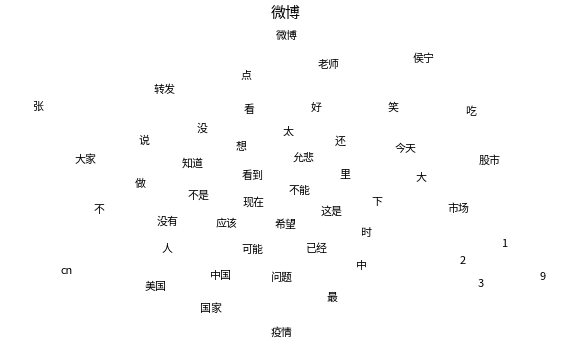

In [0]:
#plot using TSNE

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.title('ÂæÆÂçö', fontproperties= fontprop)
plt.scatter(tweets_tsneWords[:, 0], tweets_tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(tweets_w2v_Words):
    ax.annotate(word, (tweets_tsneWords[:, 0][i],tweets_tsneWords[:, 1][i]), size =  50 * (numwords - i) / numwords + 10, fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
#plot shows 

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÁâπÊúóÊôÆ') # trump

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÁæéÂõΩ', 0.8361590504646301),
 ('ÊÄªÁªü', 0.8300979137420654),
 ('ÂõΩÂä°Âçø', 0.7745875120162964),
 ('Â™í‰Ωì', 0.7614294290542603),
 ('Â§ñ‰∫§ÊîøÁ≠ñ', 0.7592089176177979),
 ('ÊîªÂáª', 0.740001916885376),
 ('ÂèóÂà∞', 0.7225712537765503),
 ('ÈíàÂØπ', 0.716701090335846),
 ('Âº∫Â§ß', 0.7124530673027039),
 ('‰πãÈó¥', 0.7108696699142456)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Áñ´ÊÉÖ') # COVID-19

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÁóÖÊØí', 0.8565771579742432),
 ('ÂÖ®ÂõΩ', 0.8410210609436035),
 ('ÂêÑÂú∞', 0.8343872427940369),
 ('Ê≠¶Ê±â', 0.8187025785446167),
 ('ÊπñÂåó', 0.8081885576248169),
 ('ÊîØÊè¥', 0.8012591004371643),
 ('ÊäóÁñ´', 0.7979190349578857),
 ('Áâ©ËµÑ', 0.7977777719497681),
 ('ÂåªÊä§‰∫∫Âëò', 0.7898539900779724),
 ('ÊÑüÊüì', 0.7861630916595459)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Á•ñÂõΩ') #motherland/homeland

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ê∂àÈô§', 0.7476192712783813),
 ('ÈÇ£‰∏ÄÂàª', 0.7438820004463196),
 ('ÂºÄËä±', 0.7145371437072754),
 ('Áì¶', 0.7115633487701416),
 ('Ê≠£ÂΩì', 0.701340913772583),
 ('Âä†‰ª•', 0.697460412979126),
 ('ËæõÊ†º', 0.6953125596046448),
 ('Á¶ΩÂÖΩ', 0.6949694156646729),
 ('Ê§çÁâ©', 0.6943340301513672),
 ('‰∏çÊÄé‰πà', 0.6918796300888062)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('È¶ôÊ∏Ø') #hong kong

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Â§±Âéª', 0.7995075583457947),
 ('Á§æ‰ºö', 0.7349972724914551),
 ('‰∏™‰∫∫', 0.7237578630447388),
 ('Ê∞ë‰∏ª', 0.7212342023849487),
 ('ÊîøÂ∫ú', 0.7206149101257324),
 ('ËøôÁßç', 0.6979120969772339),
 ('Ê≥ïÊ≤ª', 0.6971958875656128),
 ('ËøΩÊ±Ç', 0.6954541206359863),
 ('ÊâÄË∞ì', 0.6923564672470093),
 ('ËÆ§‰∏∫', 0.6908091306686401)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÂÆòÂÉö') #

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Â®±‰πê', 0.7814428806304932),
 ('ÈªëÊØîËØ∫', 0.7123031616210938),
 ('Êü†Ê™¨', 0.6863163709640503),
 ('Êçß', 0.6848892569541931),
 ('‰∫§Áªô', 0.6842864751815796),
 ('ÁßÅÂà©', 0.6731021404266357),
 ('Ë®ÄËæû', 0.6682314276695251),
 ('Âç±ÂÆ≥', 0.6608018279075623),
 ('Áëü', 0.6596230268478394),
 ('ËØùËØ≠ÊùÉ', 0.6580140590667725)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÂΩ¢Âºè‰∏ª‰πâ') #

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('‰∏ªÊùÉ', 0.8647339344024658),
 ('Â•ΩÊÑü', 0.8178634643554688),
 ('ÈòµËê•', 0.8037043809890747),
 ('ÂÄüÊ≠§', 0.7843136787414551),
 ('‰∏çÂ∫î', 0.7838783264160156),
 ('‰∫∫Áæ§', 0.783359706401825),
 ('ÂêÑÈ°π', 0.7826738357543945),
 ('ÂèåÂ±Ç', 0.7810544967651367),
 ('‰∏àÂ§´', 0.7755343914031982),
 ('ÁßØÁ¥Ø', 0.7750694751739502)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('‰∫∫Ê∞ë') # citizen/people

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÊîøÂ∫ú', 0.8418806195259094),
 ('ÂÆâÂÖ®', 0.8177719712257385),
 ('Á§æ‰ºö', 0.8137081861495972),
 ('ÂõΩÂÆ∂', 0.8056361079216003),
 ('Êàò‰∫â', 0.803462028503418),
 ('ËµÑÊ∫ê', 0.8029370307922363),
 ('ÊòæÁÑ∂', 0.7952709197998047),
 ('ÊäóÁñ´', 0.7921186685562134),
 ('Áæ§‰ºó', 0.7802132964134216),
 ('ËÆ§‰∏∫', 0.7701234221458435)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÁæéÂõΩ') #US

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('‰øÑÁΩóÊñØ', 0.8376046419143677),
 ('ÁâπÊúóÊôÆ', 0.8361591100692749),
 ('Â™í‰Ωì', 0.7943861484527588),
 ('ÊîøÊ≤ª', 0.7939070463180542),
 ('Á§æ‰ºö', 0.7787183523178101),
 ('ÊÄªÁªü', 0.7786228656768799),
 ('Âà©Áõä', 0.776421844959259),
 ('Âº∫Â§ß', 0.7713725566864014),
 ('ÂõΩÂÆ∂', 0.7684828042984009),
 ('ÂèóÂà∞', 0.7682870626449585)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Êó•Êú¨') #Japan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Èü©ÂõΩ', 0.7587536573410034),
 ('‰∏ÄÈÉ®ÂàÜ', 0.7023356556892395),
 ('È©ª', 0.6921477317810059),
 ('ÊÑèÂ§ßÂà©', 0.6907206773757935),
 ('‰ºäÊúó', 0.6812098026275635),
 ('ÂΩì‰∏≠', 0.6795153617858887),
 ('Êú¨Âúü', 0.6639458537101746),
 ('Â∑≤Áªè', 0.6614159941673279),
 ('Â∏ÆÂä©', 0.6529904007911682),
 ('Áâ©ËµÑ', 0.6357795000076294)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('‰π†ËøëÂπ≥') # Chairman Xi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÂÜÖÂ•∏', 0.7513473629951477),
 ('Âº∫Ë∞É', 0.7511773109436035),
 ('Â§ßÊµ∑', 0.7443689107894897),
 ('ÂÖãÊûóÈ°ø', 0.7389897108078003),
 ('ÂÆ£‰º†ÈÉ®', 0.7284599542617798),
 ('ÂèàÂêç', 0.7113503217697144),
 ('BBC', 0.7103856205940247),
 ('Êúù‰ª£', 0.703579306602478),
 ('ËøôÂùó', 0.7031169533729553),
 ('È¢ÜÂèñ', 0.6965652704238892)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('‰∏≠ÂõΩ') # China

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÂèëÂ±ï', 0.7727576494216919),
 ('ÁªèÊµé', 0.7670546174049377),
 ('ÂéÜÂè≤', 0.7171522378921509),
 ('ÂõΩÂÆ∂', 0.7135168313980103),
 ('Âª∫ËÆæ', 0.7087501287460327),
 ('‰∏ñÁïå', 0.67052161693573),
 ('Á§æ‰ºö', 0.6647185683250427),
 ('ËøêËΩ¨', 0.6575570106506348),
 ('ÂÖ®‰∏ñÁïå', 0.6555383205413818),
 ('Âà©Áõä', 0.6479046940803528)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Á§æ‰ºö‰∏ª‰πâ') #Socialism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Á±≥ÂõΩ', 0.8327260613441467),
 ('ÊåáÂá∫', 0.7947970628738403),
 ('‰∏≠ÂõΩÊîøÂ∫ú', 0.7757930755615234),
 ('Ê∂àÈô§', 0.7721095085144043),
 ('‰∏ª‰Ωì', 0.7702503204345703),
 ('ÊüêÁßç', 0.7539917230606079),
 ('Á≠ñÁï•', 0.7509713768959045),
 ('ÈòêÈáä', 0.7488119006156921),
 ('ÈáçÊñ∞', 0.7316106557846069),
 ('Âª∫ËÆæ', 0.7292150259017944)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ËµÑÊú¨‰∏ª‰πâ') #Capitalism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ê∑∑Ëøπ', 0.7914754152297974),
 ('ÁæéÂõΩÊîøÂ∫ú', 0.7713810205459595),
 ('ÂØπÂçé', 0.758344292640686),
 ('Êï¥Ê≤ª', 0.7582720518112183),
 ('È¢ÑÈò≤', 0.7565181255340576),
 ('ÂÖ¨Ê∞ë', 0.7525628805160522),
 ('ÈáçÂ§ß', 0.7488818168640137),
 ('ËøòÂ∞ë', 0.7476361989974976),
 ('ÊâãÊÆµ', 0.7474982738494873),
 ('Êóß', 0.7462021112442017)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Ëá™Áî±') #Freedom

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Áî≥ËØ∑', 0.6967570781707764),
 ('‰æµÁäØ', 0.6885232329368591),
 ('‰∏≠‰∏ú', 0.6637937426567078),
 ('ÁæéÂõΩ', 0.6360716223716736),
 ('‰∏ñÁïå', 0.6348210573196411),
 ('‰∏ëÈóª', 0.6166647672653198),
 ('‰øùÈöú', 0.616378903388977),
 ('ÂÖ®‰∏ñÁïå', 0.6134767532348633),
 ('‰∫∫ÊùÉ', 0.6111332178115845),
 ('ÂèòÊàê', 0.6090294122695923)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÈõÜÊùÉ') #authoritarian

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('‰∏§‰∫∫', 0.8068749904632568),
 ('ËøòÁî®', 0.8048939108848572),
 ('ÊØíË¥©', 0.7980901598930359),
 ('ËÉåÂèõ', 0.7879104018211365),
 ('ÂÅöÁ©∫', 0.7776439189910889),
 ('Âì™‰Ωç', 0.7677238583564758),
 ('‰∫ßÁâ©', 0.7645419836044312),
 ('ÂèØÂà´', 0.7603141069412231),
 ('Ë¢ãÂ≠ê', 0.7596304416656494),
 ('ÂΩ¢Âºè', 0.7594373226165771)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('‰∏≠Â§Æ') #central government

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÂÖ¨ÂºÄ', 0.8071863651275635),
 ('Âõ¢Áªì', 0.7915294170379639),
 ('Âü∫Á°Ä', 0.7822335958480835),
 ('ÂÖ±Âêå', 0.7704556584358215),
 ('ÂΩìÂàù', 0.7516046166419983),
 ('Âº∫ÁÉà', 0.7485053539276123),
 ('ÈíàÂØπ', 0.7483069896697998),
 ('Âä†Âø´', 0.7466479539871216),
 ('‰∫∫Â£´', 0.7450238466262817),
 ('Âêà‰Ωú', 0.7393502593040466)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Áà±ÂõΩ‰∏ª‰πâ') # patriotism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ËÄêÂøÉ', 0.7477452158927917),
 ('Ëá™‰ø°', 0.7383518218994141),
 ('Ë∞ãÊùÄ', 0.7257602214813232),
 ('Êù•ËÆ≤', 0.7215173244476318),
 ('Ê∂®Ë∑åÂπÖ', 0.7185440063476562),
 ('ÊûóÂ•á', 0.7085458040237427),
 ('ÊÉÖÊôØ', 0.7066860198974609),
 ('Ê≤°‰∫ãÂÑø', 0.7061009407043457),
 ('ÈÄâÊ∞ë', 0.7030928730964661),
 ('Ê°•', 0.6991231441497803)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Ê∞ë‰∏ª') # democracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('È¢ÜÂØº‰∫∫', 0.8113862872123718),
 ('‰ΩìÂà∂', 0.806749165058136),
 ('Ë•øÊñπ', 0.7864353656768799),
 ('ÂÆûË°å', 0.7745102643966675),
 ('‰πåÂÖãÂÖ∞', 0.7636207938194275),
 ('ÊîøÊ≤ª', 0.7604820728302002),
 ('ËøùÂèç', 0.7602638006210327),
 ('‰∏™‰∫∫', 0.7372004389762878),
 ('Ëá™Áî±', 0.7266658544540405),
 ('ÁæéÂõΩ', 0.7244645357131958)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Ë•øÊñπ') # the west/western

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÊïåÂØπÂäøÂäõ', 0.8755874633789062),
 ('ÊîªÂáª', 0.8492658734321594),
 ('‰øÑÁΩóÊñØ', 0.8333945870399475),
 ('ÊîøÊ≤ª', 0.8266546726226807),
 ('Âà©Áõä', 0.8080250024795532),
 ('Âà∂Â∫¶', 0.7991859316825867),
 ('Á§æ‰ºö', 0.7975409030914307),
 ('Âª∫ËÆæ', 0.7972171306610107),
 ('‰∏≠ÂõΩÊîøÂ∫ú', 0.7935303449630737),
 ('Ê∞ë‰∏ª', 0.7864353656768799)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÁæéÂ∏ù') # US(Chinese idiom: imperial US)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÁñëÈóÆ', 0.7646598815917969),
 ('Ë∂ä', 0.7220489978790283),
 ('ËÄç', 0.7071071267127991),
 ('Âº∫Áõó', 0.7008325457572937),
 ('Âè™‰ºö', 0.6969896554946899),
 ('Ë∂äÊ¥ª', 0.688361406326294),
 ('ÊòéÁ°Æ', 0.6801781058311462),
 ('Ê≠£Áªè', 0.6789870262145996),
 ('ËøàËøõ', 0.6686379313468933),
 ('Ë∂äËøá', 0.6612414121627808)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('Ë¥∏ÊòìÊàò') # trade war

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ë¥∏Êòì', 0.7735077142715454),
 ('ÂïÜ‰∏ö', 0.7592241168022156),
 ('ÂçäÂØº‰Ωì', 0.7277317047119141),
 ('ÁªèÊµé', 0.7234510183334351),
 ('Ê¥óÂä´', 0.7230732440948486),
 ('Áü•ËØÜ‰∫ßÊùÉ', 0.721356213092804),
 ('ÈÅµÂæ™', 0.7149759531021118),
 ('Â§ßÈôÜ', 0.7143816947937012),
 ('Á≤æÂáÜ', 0.7085537910461426),
 ('‰∫íËÅîÁΩë', 0.7079062461853027)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('‰∏™‰∫∫') # individual/individualistic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÈÄ†Êàê', 0.8109081387519836),
 ('ÂõΩÂÜÖ', 0.8097213506698608),
 ('Â∏¶Êù•', 0.7895599603652954),
 ('ÂèóÂà∞', 0.7890189290046692),
 ('Ë°å‰∏∫', 0.7865493297576904),
 ('ÂØºËá¥', 0.7824565172195435),
 ('ÂΩ±Âìç', 0.7717567682266235),
 ('Á§æ‰ºö', 0.7704759836196899),
 ('Ë•øÊñπ', 0.768144965171814),
 ('ÂØå‰∫∫', 0.7678707242012024)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('ÈõÜ‰Ωì') # the collective

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÂçèËÆÆ', 0.7926252484321594),
 ('Â§ßÂûã', 0.7775641679763794),
 ('ÂêÑÈ°π', 0.7678811550140381),
 ('Ë¥üË¥£‰∫∫', 0.7633770704269409),
 ('Êõ¥Âä†', 0.7627468109130859),
 ('Âõ¢Èòü', 0.7479749917984009),
 ('ÊûÅÈ´ò', 0.7440146803855896),
 ('Á†¥Ë£Ç', 0.7422567009925842),
 ('Âü∫Èáë‰ºö', 0.7417007684707642),
 ('Ê≤üÈÄö', 0.7393300533294678)]

In [0]:
# similarities - analogies: x+Y-Z = 
tweets_W2V_model.most_similar(positive=['ÁæéÂõΩ', 'ÁâπÊúóÊôÆ'], negative = ['‰∏≠ÂõΩ'])

## doc2vec

In [0]:
type(new_tweets_df['nick_name'][0])

str

In [0]:
type(new_tweets_df['year'][0])

numpy.int64

In [0]:
#sample_nortoken = new_tweets_df['normalized_tokens'][:2]

In [0]:
#join_tweets(sample_nortoken)

['ËÆ∞Âæó',
 'ÂÖ≥Ê≥®',
 ' ',
 ' ',
 'Â∑•',
 'x',
 'Âè∑',
 'ÊµÆ‰∫ë',
 'ÊòéÂ§©',
 'Êõ¥Êñ∞',
 'Â∑≤Áªè',
 'Â∑Æ‰∏çÂ§ö',
 '5000',
 'Â≠ó',
 'ËøòË¶Å',
 'ÊòéÂ§©',
 'Êõ¥Êñ∞',
 'Êï∞ÊçÆ',
 'Ë°•ÂÖÖ',
 '‰ø°ÊÅØ',
 '2',
 '24',
 'Âè∑',
 'Á¨¨‰∏ÄÊù°',
 '140',
 'Â≠ó',
 '‰∏çÂ§ü',
 'ÂõΩÂ§ñ',
 'Áñ´ÊÉÖ',
 'ÁúüÁöÑ',
 'ÂèëÁé∞',
 'Â§™',
 'tmd',
 'ËøÖÈÄü',
 'ÂíãÂäû',
 'ÁßÅ‰ø°',
 'Èáå',
 'ÂÖ®',
 'Ê¨ßÊ¥≤',
 'Âçé‰∫∫',
 'ÁΩëÂèã',
 'Âøô',
 'Ë∫≤Ëµ∑Êù•']

In [0]:
# to reduce the dimension, create a dataframe that join each user's normalized tokens by year and by user name
### User year normalized tokens
### user1 2012 ['','','',......,'']
### user2 2012 ['','','',......,'']
### user3 2012 
### user1 2013 
### user2 2013 
def join_tweets(tokenized_word_lists):
  joined_token_list = []
  for token_list in tokenized_word_lists:
    for token in token_list:
      joined_token_list.append(token)
  return joined_token_list

In [0]:
d2v_tweets_df = new_tweets_df.loc[:, ['nick_name', 'year', 'normalized_tokens']].copy()
#d2v_tweets_df.groupby(['year', 'nick_name']).agg({'normalized_tokens': join_tweets})
d2v_tweets_df_g=d2v_tweets_df.groupby(['year', 'nick_name']).agg(all_normalized_tokens=('normalized_tokens', join_tweets))

# for y in new_tweets_df['year'].unique():

#   for n in new_tweets_df['nick_name'].unique():
#     d2v_tweets_df['all_normalized_tokens'] = [].join(d2v_tweets_df['normalized_tokens'][#index])

# for index, row in new_tweets_df.iterrows():
#   row['year']
    
#     if 
#   if row['nick_name'] == 'ÈúúÂè∂' and row['year'] == 2012:
#     d2v_tweets_df['all_normalized_tokens'] = [].join(row['normalized_tokens'])
#     d2v_tweets_df = d2v_tweets_df.append(pd.DataFrame({'nick_name': nick_name * 12, 'year': year *12, 'all_normalized_tokens': }))


In [0]:
list(d2v_tweets_df_g.columns)

['all_normalized_tokens']

In [0]:
list(d2v_tweets_df_g.index)

[(2009, '‰æØÂÆÅ'),
 (2009, 'Âè∏È©¨Âçó'),
 (2010, '‰æØÂÆÅ'),
 (2010, 'ÊùéÂ∞èËêå'),
 (2011, '‰æØÂÆÅ'),
 (2011, 'Âè∏È©¨Âçó'),
 (2011, 'ÊùéÂ∞èËêå'),
 (2011, 'ËÉ°Èî°Ëøõ'),
 (2012, '‰æØÂÆÅ'),
 (2012, 'Âè∏È©¨Âçó'),
 (2012, 'ÊùéÂ∞èËêå'),
 (2012, 'ËÉ°Èî°Ëøõ'),
 (2013, '‰æØÂÆÅ'),
 (2013, 'Âè∏È©¨Âçó'),
 (2013, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2013, 'ËÉ°Èî°Ëøõ'),
 (2014, '‰æØÂÆÅ'),
 (2014, 'Âè∏È©¨Âçó'),
 (2014, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2014, 'ÊùéÂ∞èËêå'),
 (2015, '‰æØÂÆÅ'),
 (2015, 'Âè∏È©¨Âçó'),
 (2015, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2015, 'ÊùéÂ∞èËêå'),
 (2016, '‰æØÂÆÅ'),
 (2016, 'Âè∏È©¨Âçó'),
 (2016, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2017, '‰æØÂÆÅ'),
 (2017, 'Âè∏È©¨Âçó'),
 (2017, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2017, 'Êùé‰Ω≥Áê¶Austin'),
 (2018, '‰æØÂÆÅ'),
 (2018, 'Âè∏È©¨Âçó'),
 (2018, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2018, 'ÊùéÂ∞èËêå'),
 (2018, 'ËÉ°Èî°Ëøõ'),
 (2019, '‰æØÂÆÅ'),
 (2019, 'Âè∏È©¨Âçó'),
 (2019, 'Âπ≥Ê∞ëÁéãÂ∞èÁü≥'),
 (2019, 'ÊùéÂ∞èËêå'),
 (2019, 'ÁΩóÂøóÊ∏ä'),
 (2019, 'ËÉ°Èî°Ëøõ'),
 (2019, 'Èõ∑ÂÜõ'),
 (2019, 'ÈúúÂè∂'),
 (2020, 'XÁéñÂ∞ëÂπ¥Âõ¢Ë

In [0]:
d2v_tweets_df_g

all_normalized_tokens
year nick_name                                                       
2009 ‰æØÂÆÅ             [ËØ±Â§ö, ÊàêÂäü, Áªà, È±ºÂÑø, Âí¨, Èí©, httpsinaurl, cn, htJGk, ...
     Âè∏È©¨Âçó            [Âà†Ë¥¥, Âø´, Ë¥¥Êñá, ‰∏çÊ≠¢, ---, Á∫™Âøµ, ÂõΩÂ∫Ü, 60, Âë®Âπ¥, ‰∏ìÊñá, Êó†, ËøáÂàÜ...
2010 ‰æØÂÆÅ             [2010, ËΩ¶Â∏Ç, Â§ß, ÁåúÊÉ≥, BuYaoDu, ËúÄ, ÊÇç, È©¨Ë∑Ø, httpsinau...
     ÊùéÂ∞èËêå            [Ê≥°, ÂÑø, Ê≥™ÁÇπ, ÈôçÂà∞, Ë¥üÂÄº, ‰∏çËÉΩ, Âì≠, Ê≤°, Âì≠, ËØÑ‰ª∑, ‰∏ÄÈÉ®, ‰ΩúÂìÅ, 2,...
2011 ‰æØÂÆÅ             [ÊîØÊåÅ, ‰øèÊ±üÂçó, Á∫¢ÂåÖ, ‰ªäÂ§©, ‰øèÊ±üÂçó, Â∫îËØ•, ÂÖçÂçï, Êñ∞Â®òÂ≠ê, Èú≤Èù¢, Â•ΩÁæé, ÂøÉ,...
     Âè∏È©¨Âçó            [Âè∏È©¨Âçó, CNN, Ê¥ã‰∫∫, ËØ¥, ËØ¥, ‰∏≠ÂõΩ, ÁöÆËõã, ÂùèËØù, Â∫îËØ•, Á¨¨‰∏Ä, Áªù‰∏ç, Ëõã...
     ÊùéÂ∞èËêå            [Â≠©Â≠ê, ÂØπÂæÖ, ËíôÁâõ, ËØ¥, ‰∫∫, Â∑≤Áªè, Â§™Â§öÊú¨, ‰∏çÁî®, Áúã, Â™í‰Ωì, ‰∫∫, ËØ¥, Ëøô...
     ËÉ°Èî°Ëøõ            [ÁéØÁêÉÊó∂Êä•, ËøëÊó•, ‰∏çÊñ≠, Êä•Áúº, ‰ΩçÁΩÆ, ÊâìÂá∫, ÂäûÊä•, ÁêÜÂøµ, Êä•ÈÅì, Â§öÂÖÉ, ‰∏ñÁïå,...
2012 ‰æØÂÆÅ             [Ëøô‰Ωç, Â§ü, Ê¨ßÊ¥≤‰∫∫, ÂÇªËõã, Âçñ, ÂÜ∞Ê£ç, ËÄÅÂ§™Â§™, Áü•ÈÅì, Âï•Êó∂ÂÄô, ‰π∞ÁÇπ, ËÇ°Á•®, ...
     Âè∏È©¨Âçó            [ÂØÑÊúõ, ÁæéÂõΩÈ©ªÂçé‰ΩøÈ¶Ü, ÂÖàÁîü, ËøôÊù°, ÂæÆÂçö, ÁîªÈù¢, Èáå, ‰∫∫Áâ©, ÊûÑÂõæ, ‰∏ÄÁÇπ, Ëß£Èáä...
     ÊùéÂ∞èËêå            [ÂçïÈó¥, Ê¥óÊæ°, Â∞ΩÂäõ, Áúã, ÂÜ∞Â£∂, ÊØîËµõ, Áõ¥Âà∞, Âê¨ËØ¥, ‰ªäÂ§©, Á´ãÁßãÊâç, ÂèçÂ∫î, Ëøá...
     ËÉ°Èî°Ëøõ            [ÊîøÂ∫ú, ‰∏ç, ÂÖ¨ÂºÄ, ÊîØÊåÅ, Ê∞ëÈó¥, ‰∫∫Â£´, Áôª, ÈíìÈ±ºÂ≤õ, ‰∏§Â≤∏‰∏âÂú∞, ÊîøÂ∫ú, ÂÖ¨ÂºÄ, ...
2013 ‰æØÂÆÅ             [Â§ÆËßÜ, ËØ¥, PM250, ÊüêÊüê, ÊîæÂ±Å, Êí≠Âá∫, ËâØËçØËã¶Âè£Âà©‰∫éÁóÖ, Âø†Ë®ÄÈÄÜËÄ≥Âà©‰∫éË°å, ËØ¥...
     Âè∏È©¨Âçó            [‰∏ç, ÂëäËØâÊÇ®, ÁæéÂõΩ, ‰ªÖÂá≠, ÁÖßÁâá, ÊÉ≥Ë±°, ‰∏≠ÂõΩ, ‰∫∫, Á∫ΩÁ∫¶, ÂêÉÈ•≠, ÂÖâÊôØ, ‰∏ÄÂÆ∂...
     Âπ≥Ê∞ëÁéãÂ∞èÁü≥          [Êó†, ËæπÁïå, ÂïÜ‰∏ö, Á§æ‰ºö, Èáå, ÈáëÈí±, ‰π∞, Â∑¶Áøº, ÁΩëÁ´ô, Â§öÂ±û, ÈùûÁõàÂà©ÊÄß, ÁîüÂ≠ò...
     ËÉ°Èî°Ëøõ            [Âç∞Â∫¶‰∫∫, ÂêÉ, Ëèú, ÈõÜÂ∏Ç, ÈöèÊâã, Êãç, Êù°, È´òÈÄüË∑Ø, Êî∂Ë¥π, ‰æøÂÆú, 185, ÂÖ¨Èáå...
2014 ‰æØÂÆÅ             [Ê≥™ÊµÅÊª°Èù¢, ÊãâËé´ÊñØ, ‰º§ÂÅúË°•Êó∂, ÊâìÂÖ•, ÂÖ≥ÂÅ•, ÁêÉ, ÂêéËÖ∞, Ê≤°Êúâ, ËΩ¨Áßª, Âá∫ÁêÉ, Ëµ´...
     Âè∏È©¨Âçó            [Â∏åÊúõ, ÁúãÂà∞, Ë¥∫Âç´Êñπ, ÊïôÊéà, ÁæéÂõΩ, Áª¥Á®≥, ÂºóÊ†ºÊ£Æ, ‰∫ã‰ª∂, ÂØºËá¥, ÂÖ®ÂõΩ, ËîìÂª∂,...
     Âπ≥Ê∞ëÁéãÂ∞èÁü≥          [Âº†È¢ê, Ê≠¶ÂèØ, ÂèÇËÄÉ, ÂèØËÉΩ, ÊúâÂèó, Âò≤ÂºÑ, ÁêÜÁî±, ÈóÆÈ¢ò, ÊòéÁôΩ, ÂõΩÂÆ∂, ÊúÄÂêé, ‰æù...
     ÊùéÂ∞èËêå            [‰∫∫Âà∞‰∏≠Âπ¥, ÈîªÁÇº, ÂêÉÈ•≠, ÂêåÁ≠â, ÈáçË¶Å, Â§ßÊ≠•, Âø´, Ëµ∞, ÂàùÊúü, ÊïàÊûúÊòæËëó, ÂçäÂπ¥,...
2015 ‰æØÂÆÅ             [ÂØª‰∫∫ÂêØ‰∫ã, üôè, üôè, üôè, üëè, %, Âü∫Ê∞ë, Âü∫Êú¨, Ê≤°Êúâ, ËµöÈí±, ÂéüÂõ†, Âü∫Ê∞ë, ...
     Âè∏È©¨Âçó            [Âú∞ÊòØ, ÂõΩ‰ºÅ, Èí±, Èì∂Ë°å, Êù°ÊòØ, Â§¥ÂÑø, Êâπ, Ê¥ªÊòØ, Â∑•Á®ãÈòü, Âπ≤, Ê•ºËä±, ‰∏ö‰∏ª,...
     Âπ≥Ê∞ëÁéãÂ∞èÁü≥          [Â§ßÈôÜ, Â∫îËØ•, Â∞ΩÂäõ, Ëê•Êïë, ÊØïÁ´ü, ÂêåËÉû, Âè∞ÊπæÁúÅ, Êó†ËÉΩ, ‰∏≠Â§ÆÊîøÂ∫ú, ‰ªãÂÖ•, Ë¥£Êó†...
     ÊùéÂ∞èËêå            [ÊúÄËøë, Ë∂äÊù•Ë∂ä, Â•≥ÁîªÂÆ∂, Èõ∂, Âü∫Á°Ä, Áõ¥Êé•, ‰∏¥Êëπ, Â°ûÂ∞ö, Ê¢µÈ´ò, ËÄÅÂ∏à, ‰∏≠ÂõΩ, ...
2016 ‰æØÂÆÅ             [ÂæÆÁ¨ë, ‰∏ÄÁßç, ÊØîËæÉ, Âè§ËÄÅ, ÈÖøÈÄ†, ÊñπÊ≥ï, ÂéüÊù•, ÈÖí, ÈÖøÈÄ†, ËÄ∂, ÁßªÂ∏à, ÁæéÂõΩ,...
     Âè∏È©¨Âçó            [‰∫∫, ÈöæËøá, Êñ∞Èóª, ËøùÊ≥ïÂøÖÁ©∂, Ê≥ïÊ≤ª, Á§æ‰ºö, Â∫îÊúâ, ‰πã‰πâ, ÈÖøÊàê, ÂÜúÊ∞ëÂ∑•, ËøùÊ≥ï,...
     Âπ≥Ê∞ëÁéãÂ∞èÁü≥          [Âçó‰∫¨, ÂèëÂ∏É, Âà∞Â∫ï, Á´ô, Á´ãÂú∫, ÂèëË®Ä, ÂÜØÊüê, ‰∏ç‰ºö, ÂøòËÆ∞, ÁôªÂΩï, ÂØÜÁ†Å, Á¨ë,...
2017 ‰æØÂÆÅ             [‰∏≠Âçé, ‰πãÂ§ß, È£é‰øó, ‰∏çÂêå, ‰∏ÄÂ§ú, È±º, ÈæôËàû, ËΩ¶Èòü, Â±ï, È£éÊÉÖ, Áßí, Êãç, Êü≥...
     Âè∏È©¨Âçó            [Á´π‰∫ã, ÁßÅÊàø, ÊñôÁêÜ, ÈùûÊ≥ïÊãòÁ¶Å, ‰æÆËæ±Áå•‰∫µ, ÂèëÁîü, ÂèóÂÆ≥ËÄÖ, Á°Æ‰øù, Ê≤°Êúâ, ÊÄß‰æµ, ...
     Âπ≥Ê∞ëÁéãÂ∞èÁü≥          [ËØ¥, ÈÄèÂΩª, Êñ∞, Ëá™Áî±‰∏ª‰πâ, ÁªèÊµéÂ≠¶ÂÆ∂, ÊãºÂëΩ, ÂèçÂØπ, ËØ¥Êòé, ‰ª∑ÂÄº, ÊåëÊàò, Ë•øÊñπ,...
     Êùé‰Ω≥Áê¶Austin      [with, never, Áßí, Êãç, ÂæÆÂçö, Â§ßÂÆ∂, ÊÉ≥, Áúã, Êõ¥Êñ∞, Âï•Â≠ê, doge...
2018 ‰æØÂÆÅ             [Âπ¥Â§¥, ‰∫∫Âéª, ËÇ°, Ë¥®Èáè, Â•Ω, Ê≤°, Â§ÑÁêÜ, ÂÆå, ËøáÂπ¥, ‰ª∑Ê†º, Ëøò, ÁÆó, ÂÖ¨ÈÅì,...
     Âè∏È©¨Âçó            [Âåó‰∫¨Êô®Êä•, Á§æËØ¥, Ëøô‰ª∂, Êñ∞È≤ú‰∫ãÂÑø, ÂèÇ‰∏é, ‰∏Ä‰∏ã, Áé©ÂÑø, Áé©ÂÑø, È

In [0]:
# keywords that are connected to nationalistic values/sentiments
nationalistic_keywords = ['Ê∞ëÊóè‰∏ª‰πâ','Á•ñÂõΩ','Áà±ÂõΩ‰∏ª‰πâ','‰∫∫Ê∞ë','ÂõΩÂÆ∂','ÊîøÊ≤ª','‰ΩìÂà∂','Ëá™Ë±™']

In [0]:
# keywords assignment
taggedDocs = []
for index, row in d2v_tweets_df_g.iterrows():
  dockeywords = [w for w in nationalistic_keywords if w in row['all_normalized_tokens']]
  dockeywords.append(index[0])
  dockeywords.append(index[1])
  taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['all_normalized_tokens'], tags = dockeywords))
d2v_tweets_df_g['taggedDocs'] = taggedDocs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


In [0]:
d2v_tweets_df_g.head()

all_normalized_tokens                                         taggedDocs
year nick_name                                                                                                      
2009 ‰æØÂÆÅ         [ËØ±Â§ö, ÊàêÂäü, Áªà, È±ºÂÑø, Âí¨, Èí©, httpsinaurl, cn, htJGk, ...  ([ËØ±Â§ö, ÊàêÂäü, Áªà, È±ºÂÑø, Âí¨, Èí©, httpsinaurl, cn, htJGk,...
     Âè∏È©¨Âçó        [Âà†Ë¥¥, Âø´, Ë¥¥Êñá, ‰∏çÊ≠¢, ---, Á∫™Âøµ, ÂõΩÂ∫Ü, 60, Âë®Âπ¥, ‰∏ìÊñá, Êó†, ËøáÂàÜ...  ([Âà†Ë¥¥, Âø´, Ë¥¥Êñá, ‰∏çÊ≠¢, ---, Á∫™Âøµ, ÂõΩÂ∫Ü, 60, Âë®Âπ¥, ‰∏ìÊñá, Êó†, Ëøá...
2010 ‰æØÂÆÅ         [2010, ËΩ¶Â∏Ç, Â§ß, ÁåúÊÉ≥, BuYaoDu, ËúÄ, ÊÇç, È©¨Ë∑Ø, httpsinau...  ([2010, ËΩ¶Â∏Ç, Â§ß, ÁåúÊÉ≥, BuYaoDu, ËúÄ, ÊÇç, È©¨Ë∑Ø, httpsina...
     ÊùéÂ∞èËêå        [Ê≥°, ÂÑø, Ê≥™ÁÇπ, ÈôçÂà∞, Ë¥üÂÄº, ‰∏çËÉΩ, Âì≠, Ê≤°, Âì≠, ËØÑ‰ª∑, ‰∏ÄÈÉ®, ‰ΩúÂìÅ, 2,...  ([Ê≥°, ÂÑø, Ê≥™ÁÇπ, ÈôçÂà∞, Ë¥üÂÄº, ‰∏çËÉΩ, Âì≠, Ê≤°, Âì≠, ËØÑ‰ª∑, ‰∏ÄÈÉ®, ‰ΩúÂìÅ, 2...
2011 ‰æØÂÆÅ         [ÊîØÊåÅ, ‰øèÊ±üÂçó, Á∫¢ÂåÖ, ‰ªäÂ§©, ‰øèÊ±üÂçó, Â∫îËØ•, ÂÖçÂçï, Êñ∞Â®òÂ≠ê, Èú≤Èù¢, Â•ΩÁæé, ÂøÉ,...  ([ÊîØÊåÅ, ‰øèÊ±üÂçó, Á∫¢ÂåÖ, ‰ªäÂ§©, ‰øèÊ±üÂçó, Â∫îËØ•, ÂÖçÂçï, Êñ∞Â®òÂ≠ê, Èú≤Èù¢, Â•ΩÁæé, ÂøÉ...

In [0]:
d2v_tweets_df_g.columns

Index(['all_normalized_tokens', 'taggedDocs'], dtype='object')

In [0]:
print(d2v_tweets_df_g['taggedDocs'][0])

LabeledSentence(['ËØ±Â§ö', 'ÊàêÂäü', 'Áªà', 'È±ºÂÑø', 'Âí¨', 'Èí©', 'httpsinaurl', 'cn', 'htJGk', '9.18', '‰∏≠ÂõΩ', '‰∫∫', 'ÈÜçÈÜê', 'httpsinaurl', 'cn', 'htJGF', 'ÊÑüÂèπ', 'È´òÊâã', 'ËÉåÂêé', 'È´òÊâã', 'httpsinaurl', 'cn', 'htqBZ', 'Áâ©Â£Æ', 'ËÄÅ', 'Â§ßÈò¥', 'ÈöæÈÄÉ', 'httpsinaurl', 'cn', 'htZEM', '‰π±', 'ÁÉπÂ∞èÈ≤ú', 'Ê≤°Âæó', 'ÂêÉ', 'httpsinaurl', 'cn', 'htZEf', 'ÊúùÂú£', 'ÈùûËØö', 'ÂãøÊâ∞', 'Ë•øÊ∫™', 'ÊπøÂú∞', 'httpsinaurl', 'cn', 'hcUBQ', 'Ë≠¶Á§∫', 'Â∏åÊúõ', 'ÈÇÆÂ∏Ç', 'Ê¨°Ë¥∑', 'Âç±Êú∫', '‰πãÊàëËßÅ', 'httpsinaurl', 'cn', 'hcANf', 'ÂèåËäÇ', 'ÁÉ≠ÊÉÖ', 'Âá∫Ê∏∏', 'Êó†ÊÉß', 'Áî≤ÊµÅ', 'httpsinaurl', 'cn', 'hczG6', 'Ê∞∏ÊÅí', 'ÊóãÂæã', 'Ê≠åÂî±Á•ñÂõΩ', 'httpsinaurl', 'cn', 'ht1Ge', 'ÊÑø', '60', 'Â§ßÂ∫Ü', 'Ââç', 'Ë°åÊÉÖ', 'Â§ßÁ∫¢Â§ßÁ¥´', 'httpsinaurl', 'cn', 'htnZ2', 'ÂéÜÂè≤', 'Ëµ∞Ëøá', '‰æØÂÆÅ', '‰∏É', 'Â∞Å‰ø°', 'httpsinaurl', 'cn', 'htRh0', 'Â∑®ÂÄ∫', 'È´òÂéã', '‰ø°Ë¥∑', 'Â¢ûÈïø', 'Èù¢‰∏¥', 'ÊòéÊòæ', 'ÂáèÈÄü', 'httpsinaurl', 'cn', 'htjYq', 'ËØªÂ§ß', 'ËêßÊù°', 'ÂÅ∂ÊÑü', 'httpsinaurl', 'cn', 

In [0]:
#train a doc2vec model
TweetsD2V_model = gensim.models.doc2vec.Doc2Vec(d2v_tweets_df_g['taggedDocs'], size = 100) #Limiting to 50 dimensions



/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [0]:
#look at vectors of documents tagged with the release year 2019
TweetsD2V_model.docvecs[2019]

array([-0.55031765,  0.43690258,  0.23639405,  0.7335439 , -0.22319447,
        0.84085405, -1.9932445 ,  0.08699383,  2.286261  , -2.1775086 ,
       -1.4341606 , -0.3868425 ,  0.85659075,  1.122544  ,  2.6562479 ,
        0.22344768,  0.9646305 , -1.7681277 , -1.1792994 ,  1.0868903 ,
       -2.3622773 ,  1.1220796 , -0.70485395,  0.06710459, -0.4694608 ,
       -0.8863788 , -0.1741953 , -1.7294497 ,  0.51761556, -0.71940917,
        1.1822784 ,  1.3774415 , -0.15587604, -1.6601297 ,  2.9756563 ,
        1.4465507 , -2.5673318 , -0.08021849, -2.8203983 , -1.2355021 ,
        0.5287697 ,  2.1628437 , -0.1922367 ,  0.7012033 , -0.11769585,
       -1.2915381 , -1.4427851 , -0.6120254 , -2.3337862 , -1.865325  ,
        0.55259407, -0.28532198,  0.77911496, -0.34534186,  1.5478013 ,
       -0.180678  , -0.15285692, -0.5448759 , -0.04580271, -0.34806976,
       -1.0203456 , -0.45192048, -0.02424724, -1.5597718 ,  1.610668  ,
       -0.22689474,  0.78830147,  1.6069702 ,  0.16439246, -2.08

In [0]:
#look at vectors of documents tagged with the user_id 1700162184
TweetsD2V_model.docvecs['ÈúúÂè∂']

array([ 0.1265358 , -0.17339276,  0.02223045,  0.12476181,  0.03464509,
        0.17189735, -0.31413516,  0.03831918,  0.28005278, -0.26934567,
       -0.18296199, -0.12377041,  0.21165839,  0.22238524,  0.38399404,
        0.02938122,  0.10166568, -0.29324064, -0.23776925,  0.12923554,
       -0.31479535,  0.08988272, -0.0599186 ,  0.13824382, -0.00430022,
       -0.11204112, -0.01010468, -0.12741524, -0.01377758, -0.04071234,
        0.11590657,  0.12048795,  0.03043196, -0.2004964 ,  0.18935691,
        0.14327025, -0.13024879, -0.00728389, -0.16592348, -0.0979967 ,
       -0.08551826, -0.02237643, -0.04346853,  0.03281496, -0.0462095 ,
        0.11570563, -0.00456998, -0.0069489 , -0.11079499, -0.11451277,
        0.14306936,  0.04168005,  0.01301295, -0.01477611, -0.02810639,
       -0.07680228, -0.04941341,  0.02761102,  0.03069765,  0.04193847,
        0.02743251,  0.01272811,  0.10869782, -0.05470305,  0.26660398,
       -0.08229971,  0.09196087,  0.08518645, -0.05888461, -0.25

In [0]:
# look at vector of words
TweetsD2V_model['Á•ñÂõΩ']

array([-0.0269899 , -0.00917549,  0.02246053,  0.05464015, -0.0056778 ,
        0.04347435, -0.11409826,  0.00460939,  0.12811007, -0.12206446,
       -0.07245572, -0.02774914,  0.06231204,  0.06141018,  0.16794403,
        0.00561197,  0.06563175, -0.11896577, -0.07303412,  0.05154964,
       -0.13569294,  0.04256594, -0.05395315,  0.00920474, -0.00321484,
       -0.03659275, -0.01468479, -0.08674578,  0.01695096, -0.04006043,
        0.0597664 ,  0.07054669,  0.00704322, -0.08577253,  0.14157921,
        0.06939209, -0.12824874, -0.00070211, -0.1208733 , -0.06213327,
        0.02426137,  0.1463727 , -0.01934779,  0.04758549, -0.01426541,
       -0.07203733, -0.10840263, -0.05171932, -0.19896294, -0.14198393,
        0.04419376, -0.01696397,  0.07092277, -0.02547831,  0.1252365 ,
       -0.01981877, -0.02876107, -0.04856811, -0.00470487,  0.00161078,
       -0.07827322, -0.03674861, -0.00172714, -0.12750076,  0.11457337,
       -0.03728497,  0.04366372,  0.08983235,  0.0006255 , -0.12

In [0]:
# look at documents similar to words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['Á•ñÂõΩ']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÊùéÊ∑ºÊùé‰∏âÊ∞¥', 0.9983935356140137),
 (2018, 0.998296856880188),
 (2009, 0.9979704022407532),
 ('Êùé‰Ω≥Áê¶Austin', 0.9978705048561096),
 ('‰∫∫Ê∞ë', 0.997523307800293)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2015
#TweetsD2V_model.docvecs[2019]
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2015]], topn=5)

ERROR! Session/line number was not unique in database. History logging moved to new session 62


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Êó©ÂÆâ', 0.8137458562850952),
 ('üôè', 0.8090915679931641),
 ('Á¨ë', 0.8049312829971313),
 ('Â∏ÇÂÄº', 0.80263352394104),
 ('cry', 0.8014626502990723)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2017
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2017]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('‰æØ', 0.996616005897522),
 ('‰∫åÂìà', 0.9966049194335938),
 ('Âñù', 0.9965161681175232),
 ('Áâõ', 0.9963723421096802),
 ('ÊôöÂÆâ', 0.9963630437850952)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2018
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2018]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Âåó‰∫¨', 0.9997639656066895),
 ('Â∑≤Áªè', 0.9997058510780334),
 ('Â§©', 0.9997027516365051),
 ('üê≤', 0.9996809363365173),
 ('‰ªäÂ§©', 0.9996676445007324)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2019
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2019]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('2', 0.9977626800537109),
 ('4', 0.9971338510513306),
 ('‰ΩôÂπ¥', 0.9964352250099182),
 ('Â∫Ü', 0.9961037635803223),
 ('Áà±ÊÉÖ', 0.9954959154129028)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2020
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2020]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Êó†Á∫ø', 0.9952207803726196),
 ('Âø´ÂÖÖ', 0.9939093589782715),
 ('ÊÄßËÉΩ', 0.9937069416046143),
 ('ËΩ¨Âèë', 0.993625283241272),
 ('Á∫øÊÄß', 0.993546724319458)]

In [0]:
# top 5 documents most similar to multiple words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['Á•ñÂõΩ']+TweetsD2V_model['Ëá™Ë±™']+TweetsD2V_model['‰∫∫Ê∞ë']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÊùéÊ∑ºÊùé‰∏âÊ∞¥', 0.9992374181747437),
 ('Êùé‰Ω≥Áê¶Austin', 0.9990488290786743),
 (2018, 0.9978747963905334),
 ('XÁéñÂ∞ëÂπ¥Âõ¢ËÇñÊàòDAYTOY', 0.9975910186767578),
 (2009, 0.997568666934967)]

In [0]:
#top 5 documents most similar to multiple words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['‰ΩìÂà∂']+TweetsD2V_model['ÊîøÊ≤ª']+TweetsD2V_model['ÂÆòÂëò']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ÊùéÊ∑ºÊùé‰∏âÊ∞¥', 0.9989253282546997),
 ('Êùé‰Ω≥Áê¶Austin', 0.9987444877624512),
 (2018, 0.9973776340484619),
 ('XÁéñÂ∞ëÂπ¥Âõ¢ËÇñÊàòDAYTOY', 0.9972051382064819),
 (2009, 0.9970474243164062)]

In [0]:
# heatmap with keywords
heatmapMatrix = []
for tagOuter in nationalistic_keywords:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in nationalistic_keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)


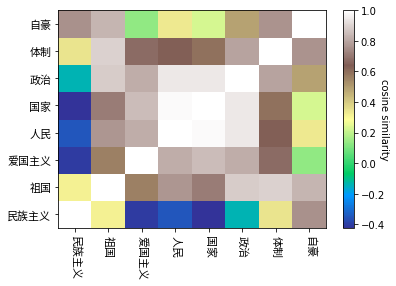

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(nationalistic_keywords, minor=False, rotation=270, fontproperties= fontprop)
a = ax.set_yticklabels(nationalistic_keywords, minor=False, fontproperties= fontprop)

This heat map shows ‚Äú‰ΩìÂà∂‚ÄùÔºà"political system"Ôºâ (referring to that in China) has high cosine similarity with sentiments such as ‚ÄúËá™Ë±™‚ÄùÔºà"proud"Ôºâ and ‚ÄúÊîøÊ≤ª‚ÄùÔºà"politics"Ôºâ, suggesting the individual accounts in my corpus have positive sentiments toward the political system in China. The word "‰ΩìÂà∂"Ôºà"political system"Ôºâ also has high cosine similarity with "Á•ñÂõΩ"("home country/ mother land"). Also, words such as "ÂõΩÂÆ∂" ("nation/country")and "‰∫∫Ê∞ë" ("people") also have high cosine similarity with "ÊîøÊ≤ª" ("politics"). What's also interesting is that the heatmap shows "Ëá™Ë±™" ("proud") and "Áà±ÂõΩ‰∏ª‰πâ"("patriotim") have low cosine similarity (the score centers around zero), suggesting patriotism is not closely associatied sentiments that convery one's pride toward the country. 

From the heatmap, we can also see that "Áà±ÂõΩ‰∏ª‰πâ" ("patriotism") and "‰∫∫Ê∞ë"("people") and "ÂõΩÂÆ∂" ("nation/country") have negative cosine similarity with "Ê∞ëÊóè‰∏ª‰πâ" Ôºà‚Äúnatiaonlism‚ÄùÔºâ.

In [0]:
# heatmap of tweets over the 9 years
targetdocs = [2012,2013,2014,2015,2016,2017,2018,2019,2020]
#targetMovs = wiki_df_2['Title'][:10]
heatmapMatrixD = []

for tagOuter in targetdocs:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetdocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

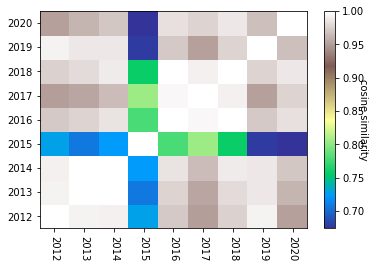

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetdocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetdocs, minor=False)

The heatmap indicates the documents from the year 2015 are most dissimilar with others. I wonder why. 

In [0]:
# heatmap of tweets over 9 years and keywords
heatmapMatrixC = []

for tagOuter in targetdocs:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in nationalistic_keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

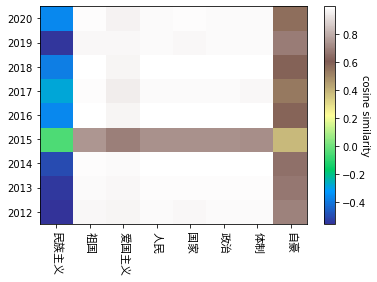

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(nationalistic_keywords, minor=False, rotation=270, fontproperties= fontprop)
a = ax.set_yticklabels(targetdocs, minor=False)

In [0]:
# ### if I can identify 3 set of keywords for each dimension of nationalism, I can draw the heatmap of years over the keywords for each dimension

## projection - use a dictionary and do the analysis again

perception of national politics (agreeable to not agreeable sentiments) - sentiments toward the government
group membership and identification (agreeable to not agreeable sentiments) - sentiments toward ethnic group
perception of other nation-states such as U.S., Japan (agreeable to not agreeable sentiments)

In [0]:
#tweets_W2V_model

In [0]:
#Word list to be projected onto the three dimensions
nations = ["‰∏≠ÂõΩ","ÁæéÂõΩ","Êó•Êú¨","Èü©ÂõΩ","‰øÑÁΩóÊñØ","‰ºäÊúó","ÊÑèÂ§ßÂà©","ÊúùÈ≤ú","Âæ∑ÂõΩ","Ëã±ÂõΩ","Ê≥ïÂõΩ","Ë•øÁè≠Áâô","Âä†ÊãøÂ§ß","Ëë°ËêÑÁâô","Âç∞Â∫¶","Ë∂äÂçó"]


In [0]:
# word lists to create dimensions
targetword_list = ['ÂØåÊúâ','Âº∫Â§ß','ÂØåË£ï','ÊúâÈí±','ÂØå','Â•Ω','ÂèëËææ','ÁπÅËç£','Ë°∞Ë¥•','Ëã¶','Á©∑', 'ËêΩÂêé', 'ÂèØÊÄú','Âõß','Â∑Æ','‰∏çÂ•Ω','‰∏çÂ§ü','Ë¥üÂÄ∫', 'ÂÖ¨Âπ≥','ÂÖ¨Ê≠£','ÈÄèÊòé','Ê≥ïÂà∂','Ëá™Áî±','ÂêàÁêÜ','Âº∫','Âº±','ËÖêË¥•','Ë¥™Ê±°','Ë¥øËµÇ','Áã¨Ë£Å','‰∏ëÈóª','È™óÂ±Ä','ÈõÜÊùÉ','ÂÆ°Êü•',]

# words we will be mapping
targetword_list += nations

wordsSubMatrix = []
for word in targetword_list:
    wordsSubMatrix.append(tweets_W2V_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
wordsSubMatrix

array([[ 0.01794834, -0.13002822, -0.1859183 , ...,  0.18149182,
         0.03836446,  0.00676159],
       [ 0.10163912, -0.11332846, -0.13943782, ..., -0.00551748,
         0.37999254,  0.14268038],
       [-0.18290168, -0.07697418,  0.01295296, ...,  0.05778351,
         0.04359556,  0.10046434],
       ...,
       [ 0.02108358, -0.00608083,  0.00807609, ...,  0.01238317,
        -0.05820643, -0.03111525],
       [-0.18301938, -0.14184813, -0.29193142, ...,  0.0680482 ,
         0.38586676,  0.20953295],
       [ 0.16967137, -0.03324532,  0.05804718, ..., -0.06351911,
         0.07088817,  0.07807863]], dtype=float32)

In [0]:
pcaWord = sklearn.decomposition.PCA(n_components = 34).fit(wordsSubMatrix)
reducedPCA_data = pcaWord.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWord = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

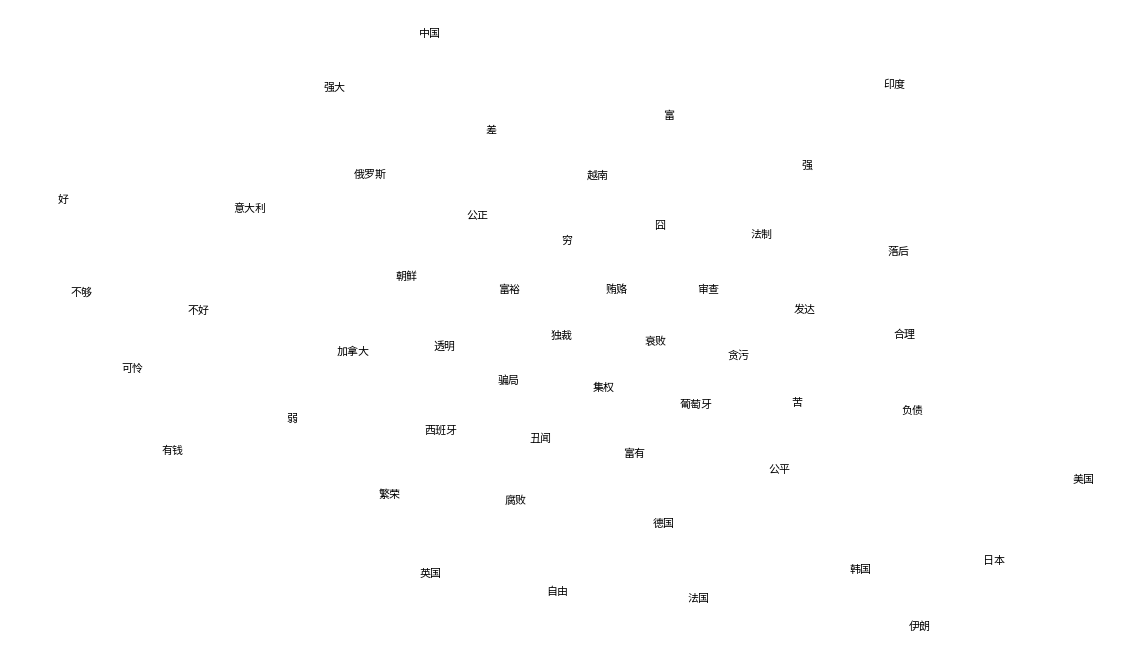

In [0]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWord[:, 0], tsneWord[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(targetword_list):
    ax.annotate(word, (tsneWord[:, 0][i],tsneWord[:, 1][i]), size =  50 * (len(targetword_list) - i) / len(targetword_list) + 10, fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.show()


In [0]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives]) #means whatever the model returns will be a vector
    return diff
# sum the normalized vector of each modeled word in positives list - sum of the normalized vector of each word in the negative list
# (X1+X2+X3) - (Y1+Y2+Y3)


In [0]:
# create 3 dimensions of natioanlism
economy =  dimension(tweets_W2V_model, ['ÂØåÊúâ','ÂØåË£ï','ÊúâÈí±','ÂØå','ÂèëËææ','ÁπÅËç£'], ['Ë°∞Ë¥•','Ëã¶','Á©∑', 'ËêΩÂêé', 'ÂèØÊÄú','Âõß','Â∑Æ','‰∏çÂ•Ω','‰∏çÂ§ü','Ë¥üÂÄ∫'])
political_system = dimension(tweets_W2V_model, ['ÂÖ¨Âπ≥','ÂÖ¨Ê≠£','ÈÄèÊòé','Ê≥ïÂà∂','Ëá™Áî±','ÂêàÁêÜ','Âº∫'],['Âº±','ËÖêË¥•','Ë¥™Ê±°','Ë¥øËµÇ','Áã¨Ë£Å','‰∏ëÈóª','È™óÂ±Ä','ÈõÜÊùÉ','ÂÆ°Êü•'])



# Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
# Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
# Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
###
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), economy.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), political_system.reshape(1,-1))[0][0])
        #c.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'economy': g, 'political_system': r}, index = word_list)
    return df
#to project each word in the word list, i.e. occupations, foods, sports, to the three dimensions (gender, race, class)


In [0]:
nation_df = makeDF(tweets_W2V_model, nations)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-

In [0]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim): #dim stands for dimension
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12, fontproperties= fontprop)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

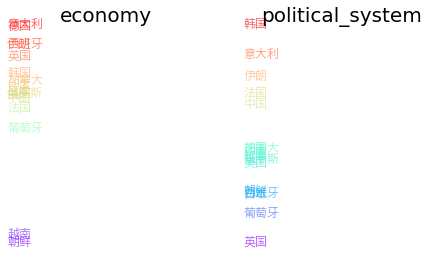

In [0]:
# plot nations on the dimension of economy
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, nation_df, 'economy')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, nation_df, 'political_system')
#ax3 = fig.add_subplot(133)
#PlotDimension(ax3, OCCdf, 'class')
plt.show()

I project the nation word list onto two dimension, i.e. economy and political system. The results is somewhat counterintuitive. On the economy dimension, the graph indicates that people in my weibo corpus seem to think Italy, Germany, and Iran are rich while Vietnam and North Korea are poor. On the political dimension, the freer, more democratic countries are South Korea while the most corrupted country is England (which does not seem to be making sense).

However, this analysis has several limitations. First, the words I used to create the political system and economy dimenisons are fairly arbitrary and subjective. To make the projection method work, I need to find a way to make the list of words I use more objective. For instance, I should consult a Chinese dictionary or theasaurus to refer to the synonyms associated with ‚ÄùÊ∞ë‰∏ª‚Äú ("democratic"), for instance. Same for "ÈõÜÊùÉ" ("authoritarian")„ÄÇ 

Secondly, I should also make the dimension on something more narrow instead of political system, which is pretty broad and hard to create a dimension using positive words and negative words. For instance, instead of having a political system dimension, I could have a dimension along the line of "democratic" vs. "undemocratic"; a third dimension on "authoritarian" vs. "non-authoritarian". 

Thirdly, the less satisfactory result might be due to a small and unrepresentative sample. The results might reflect the sentiments and values of the corpus I have but can't be used to generalize the broader sentiments of the weibo population.

In [0]:
### likelihood score: who are likely to be nationalistic?

## linguistic change or difference


In [0]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [0]:
d2v_tweets_df_g.head()

all_normalized_tokens                                         taggedDocs
year nick_name                                                                                                      
2009 ‰æØÂÆÅ         [ËØ±Â§ö, ÊàêÂäü, Áªà, È±ºÂÑø, Âí¨, Èí©, httpsinaurl, cn, htJGk, ...  ([ËØ±Â§ö, ÊàêÂäü, Áªà, È±ºÂÑø, Âí¨, Èí©, httpsinaurl, cn, htJGk,...
     Âè∏È©¨Âçó        [Âà†Ë¥¥, Âø´, Ë¥¥Êñá, ‰∏çÊ≠¢, ---, Á∫™Âøµ, ÂõΩÂ∫Ü, 60, Âë®Âπ¥, ‰∏ìÊñá, Êó†, ËøáÂàÜ...  ([Âà†Ë¥¥, Âø´, Ë¥¥Êñá, ‰∏çÊ≠¢, ---, Á∫™Âøµ, ÂõΩÂ∫Ü, 60, Âë®Âπ¥, ‰∏ìÊñá, Êó†, Ëøá...
2010 ‰æØÂÆÅ         [2010, ËΩ¶Â∏Ç, Â§ß, ÁåúÊÉ≥, BuYaoDu, ËúÄ, ÊÇç, È©¨Ë∑Ø, httpsinau...  ([2010, ËΩ¶Â∏Ç, Â§ß, ÁåúÊÉ≥, BuYaoDu, ËúÄ, ÊÇç, È©¨Ë∑Ø, httpsina...
     ÊùéÂ∞èËêå        [Ê≥°, ÂÑø, Ê≥™ÁÇπ, ÈôçÂà∞, Ë¥üÂÄº, ‰∏çËÉΩ, Âì≠, Ê≤°, Âì≠, ËØÑ‰ª∑, ‰∏ÄÈÉ®, ‰ΩúÂìÅ, 2,...  ([Ê≥°, ÂÑø, Ê≥™ÁÇπ, ÈôçÂà∞, Ë¥üÂÄº, ‰∏çËÉΩ, Âì≠, Ê≤°, Âì≠, ËØÑ‰ª∑, ‰∏ÄÈÉ®, ‰ΩúÂìÅ, 2...
2011 ‰æØÂÆÅ         [ÊîØÊåÅ, ‰øèÊ±üÂçó, Á∫¢ÂåÖ, ‰ªäÂ§©, ‰øèÊ±üÂçó, Â∫îËØ•, ÂÖçÂçï, Êñ∞Â®òÂ≠ê, Èú≤Èù¢, Â•ΩÁæé, ÂøÉ,...  ([ÊîØÊåÅ, ‰øèÊ±üÂçó, Á∫¢ÂåÖ, ‰ªäÂ§©, ‰øèÊ±üÂçó, Â∫îËØ•, ÂÖçÂçï, Êñ∞Â®òÂ≠ê, Èú≤Èù¢, Â•ΩÁæé, ÂøÉ...

In [0]:
new_tweets_df.head()

_id  ...                                  normalized_tokens
0  1980768563_Iw9dilFaJ  ...                              [ËÆ∞Âæó, ÂÖ≥Ê≥®, Â∑•, x, Âè∑, ÊµÆ‰∫ë]
1  1980768563_Iy1lKeTGg  ...  [ÊòéÂ§©, Êõ¥Êñ∞, Â∑≤Áªè, Â∑Æ‰∏çÂ§ö, 5000, Â≠ó, ËøòË¶Å, ÊòéÂ§©, Êõ¥Êñ∞, Êï∞ÊçÆ, Ë°•ÂÖÖ,...
2  1980768563_Iy1iKDvHR  ...                         [Ë∞¢Ë∞¢, Ë∞¢Ë∞¢‰Ω†‰ª¨, Â•âÁåÆ, ÁúüÁöÑ, ÊÑü‰∫∫, ZH]
3  1980768563_Iy19ymfjm  ...  [Ê¨ßÊ¥≤, Â∞æÁõò, ÂèçÂºπ, ÂéüÊù•, Ëâπ, Ë∑≥Ê∞¥, 3%, Ë∑åÂà∞, 2%, ËøôÂè£, ÊØíÂ•∂, Ê¨ßÊ¥≤...
4  1980768563_Iy13sbx39  ...  [Ëâπ, Ë∑≥Ê∞¥, 3%, Ë∑åÂà∞, 2%, ËøôÂè£, ÊØíÂ•∂, Ê¨ßÊ¥≤, ‰∏âÂ§ßËÇ°, Ê≤°, ÂÆà‰Ωè, ËÇ°Â∏Ç...

[5 rows x 21 columns]

In [0]:

def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_tokens'], hs=1, negative = 0)
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned




In [0]:
rawEmbeddings, comparedEmbeddings = compareModels(new_tweets_df, 'year')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [0]:
print(comparedEmbeddings[2012])
print(sorted(set(new_tweets_df['year'])))

[<gensim.models.word2vec.Word2Vec object at 0x7fca5c704f60>, <gensim.models.word2vec.Word2Vec object at 0x7fca5749e710>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c69d358>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c709eb8>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f27b8>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2940>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2908>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f28d0>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2898>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2860>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2828>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f27f0>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2780>]
[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [0]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [0]:
comparedEmbeddings[2012]


‰∏≠ÂõΩ


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 

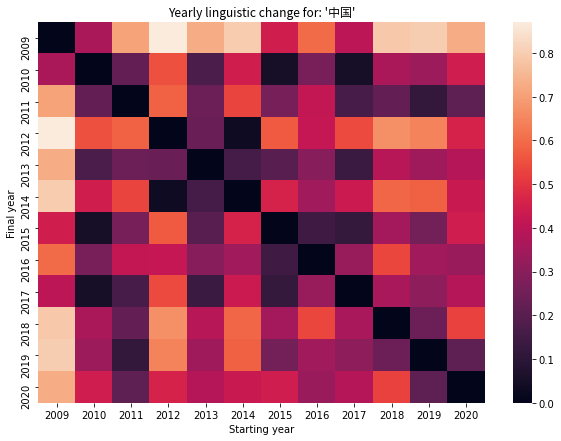

In [0]:
targetWord = '‰∏≠ÂõΩ'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord), fontproperties= fontprop)
plt.show()

In [0]:
# targetWord = 'ÁæéÂõΩ'

# pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
# fig, ax = plt.subplots(figsize = (10, 7))
# sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
# ax.set_xlabel("Starting year")
# ax.set_ylabel("Final year")
# ax.set_ylabel("Final year")
# ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
# plt.show()

ÁæéÂõΩ


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


KeyError: ignored